#  Continuous Regularized Wasserstein Barycenters

In [ ]:
pip install POT


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as func
import matplotlib.pyplot as plt
import scipy

import ot
from scipy.stats import multivariate_normal


pour  calculer deux duals conhtinu Il faut :
* inilialiser les duals avec des nn
*  faire un sampling des distributions
*


In [ ]:
import torch

def uniform_rectangle_torch(extent, float_dtype=torch.float32):
    x0, x1, y0, y1 = extent

    # Calculate the density of the uniform distribution over the rectangle
    density = torch.tensor(1 / ((x1 - x0) * (y1 - y0)), dtype=float_dtype)

    # Define a function to sample from the uniform distribution
    def sample(batch_size):
        xs = torch.rand(batch_size) * (x1 - x0) + x0
        ys = torch.rand(batch_size) * (y1 - y0) + y0
        return torch.stack([xs, ys], dim=1)

    # Define a function to calculate the probability density function (pdf)
    def pdf(ps):
        mask_x = (x0 <= ps[:, 0]) & (ps[:, 0] <= x1)
        mask_y = (y0 <= ps[:, 1]) & (ps[:, 1] <= y1)
        mask = mask_x & mask_y
        return torch.where(mask, density, torch.tensor(0.0, dtype=float_dtype))

    return sample, pdf

def uniform_rectangle_torch_centered(extent, float_dtype=torch.float32):
    x0, x1, y0, y1 = extent

    # Calculate the density of the uniform distribution over the rectangle
    density = torch.tensor(1 / ((x1 - x0) * (y1 - y0)), dtype=float_dtype)

    # Calculate the mean of the rectangle
    mean_x = (x0 + x1) / 2
    mean_y = (y0 + y1) / 2

    # Define a function to sample from the centered uniform distribution
    def sample(batch_size):
        xs = torch.rand(batch_size) * (x1 - x0) + x0 - mean_x
        ys = torch.rand(batch_size) * (y1 - y0) + y0 - mean_y
        return torch.stack([xs, ys], dim=1)

    # Define a function to calculate the probability density function (pdf)
    def pdf(ps):
        mask_x = (x0 <= ps[:, 0]) & (ps[:, 0] <= x1)
        mask_y = (y0 <= ps[:, 1]) & (ps[:, 1] <= y1)
        mask = mask_x & mask_y
        return torch.where(mask, density, torch.tensor(0.0, dtype=float_dtype))

    return sample, pdf



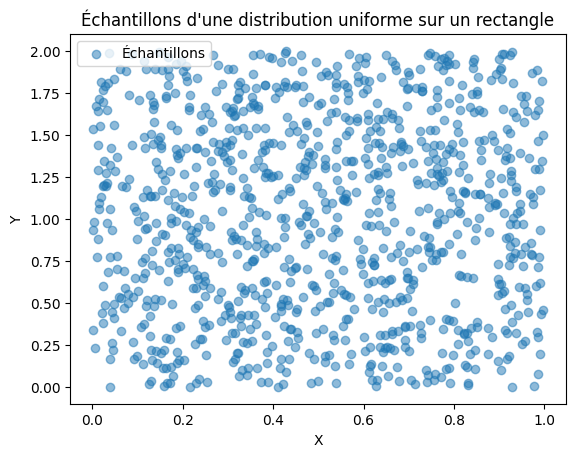

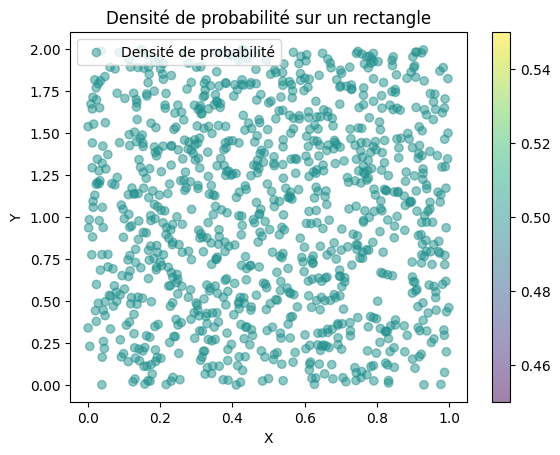

In [ ]:
# Définir les limites du rectangle
rectangle_extent = (0.0, 1.0, 0.0, 2.0)

# Créer un générateur de distribution uniforme sur le rectangle
sample_func, pdf_func = uniform_rectangle_torch(rectangle_extent)

# Générer des échantillons
batch_size = 1000
samples = sample_func(batch_size)

# Calculer la densité de probabilité pour les échantillons générés
pdf_values = pdf_func(samples)

# Afficher les échantillons et la densité de probabilité
plt.scatter(samples[:, 0], samples[:, 1], label='Échantillons', alpha=0.5)
plt.title('Échantillons d\'une distribution uniforme sur un rectangle')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Afficher la densité de probabilité
plt.scatter(samples[:, 0], samples[:, 1], c=pdf_values, cmap='viridis', label='Densité de probabilité', alpha=0.5)
plt.title('Densité de probabilité sur un rectangle')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.legend()
plt.show()

In [ ]:
samples.shape

torch.Size([1000, 2])

In [ ]:
def gaussian_1d_np(mean, sdv):
    N = scipy.stats.norm(loc=mean, scale=sdv)
    return N.rvs,N.pdf
def gaussian_2d_np(mean, covariance_matrix, size=1000):
  # Générer des échantillons à partir d'une distribution gaussienne en 2D
    gaussian_samples = np.random.multivariate_normal(mean, covariance_matrix, size)
    rv = multivariate_normal(mean, covariance_matrix)
    return gaussian_samples,rv

In [ ]:

def sample_dist(dist, batch_size):
  X_batch=[]
  if dist=='rect1' :
    extent= (0.0, 1.0, 0.0, 1.0)
    sample_func, pdf_func = uniform_rectangle_torch(extent)
    X_batch=sample_func(batch_size)
  if dist=='rect2' :
    extent= (2.0, 4.0, 3.0, 4.0)
    sample_func, pdf_func = uniform_rectangle_torch(extent)
    X_batch=sample_func(batch_size)
  if dist=='rect3' :
    extent= (3.0, 4.0, 0.0, 2.0)
    sample_func, pdf_func = uniform_rectangle_torch(extent)
    X_batch=sample_func(batch_size)
  if dist=='Uni':
    extent= (0.0, 5.0, 0.0, 5.0)
    sample_func, pdf_func = uniform_rectangle_torch(extent)
    X_batch=sample_func(batch_size)
  if dist=='gauss1':
    mean=0
    svd=1
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gauss2':
    mean=0
    svd=0.8
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gauss3':
    mean=0
    svd=2
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)

  if dist=='gauss4':
    mean=0
    svd=1.5
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gauss5':
    mean=0
    svd=0.5
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gauss6':
    mean=0
    svd=1.8
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gaussm1':
    mean=0
    svd=1
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gaussm2':
    mean=10
    svd=2
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gaussm3':
    mean=5
    svd=2
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)

  if dist=='gaussm4':
    mean=-10
    svd=1.5
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gaussm5':
    mean=-1
    svd=0.5
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)
  if dist=='gaussm6':
    mean=-5
    svd=1.8
    rvs,pdf=gaussian_1d_np(mean, svd)
    X_batch=torch.Tensor(rvs(batch_size)).reshape(-1,1)

  if dist=='gaussd1':
    mean=[0,0]
    svd=[[1, 0.5], [0.5, 1]]
    X_batch=torch.Tensor(np.random.multivariate_normal(mean, svd, batch_size))
  if dist=='gaussd2':
    mean=[1,1]
    svd=[[1, 0], [0, 1]]
    X_batch=torch.Tensor(np.random.multivariate_normal(mean, svd, batch_size))
  if dist=='gaussd3':
    mean=[0.5,0.5]
    svd=[[2, 0.5], [0.5, 2]]
    X_batch=torch.Tensor(np.random.multivariate_normal(mean, svd, batch_size))

  if dist=='gaussd4':
    mean=[2,2]
    svd=[[2, 1], [1, 2]]
    X_batch=torch.Tensor(np.random.multivariate_normal(mean, svd, batch_size))
  if dist=='gaussd5':
    mean=[1,0]
    svd=[[2, 1.5], [1.5, 2]]
    X_batch=torch.Tensor(np.random.multivariate_normal(mean, svd, batch_size))
  if dist=='gaussd6':
    mean=[0,1]
    svd=[[2.5, 2], [2,2.5]]
    X_batch=torch.Tensor(np.random.multivariate_normal(mean, svd, batch_size))
  return X_batch






In [ ]:
device='cuda'
reg=0.4
batch_size=1000
class Net(nn.Module):
    def __init__(self, input_d=2, output_d=1):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_d, 128)
        self.fc2 = nn.Linear(128, 256)

        self.fc6 = nn.Linear(256, output_d)

    def forward(self, x):
        x = x.float()
        x = func.relu(self.fc1(x))
        x = func.relu(self.fc2(x))
        x = self.fc6(x).double()
        return x


def compute_cost(Xs_batch,Xt_batch): # vérifier les dimensions
  return torch.sum((Xs_batch - Xt_batch)**2, dim=1)


def reg_value(f_batch, g_batch,g_barre,cost,reg ):
  val= f_batch+g_batch-g_barre-cost
  return reg*torch.exp(val/reg)

def reg_valuel2(f_batch, g_batch,g_barre,cost,reg ):
  val= f_batch+g_batch-g_barre-cost
  return (1/(2*reg))*torch.maximum(val,torch.zeros(val.shape).to(device))



def compute_duals(weights, n_epochs=100,input_d=2,output_d=1,device='cuda',dist1=['rect1','rect2','rect3'],dist2='Uni',batch_size=batch_size,reg=reg,lr=0.005):
  fs=[]
  gs=[]
  nb_dist=len(dist1)

  trainable_vars=[]
  for i in range(nb_dist):
    f=Net(input_d=input_d, output_d=output_d).to(device)
    g=Net(input_d=input_d, output_d=output_d).to(device)
    trainable_vars.extend(f.parameters())
    trainable_vars.extend(g.parameters())
    fs.append(f)
    gs.append(g)


  optimizer = torch.optim.Adam(trainable_vars, lr=lr)
  losses=[]

  for i in range(n_epochs):
    X_batches=[]

    for j in range (nb_dist):
      X_batch= sample_dist(dist1[j],batch_size)
      #print(X_batch.shape)
      X_batches.append(X_batch.to(device))
    Y_batch=sample_dist(dist2,batch_size).to(device)
    liste_g=[g(Y_batch) for g in gs]
    #print('epoch',i, liste_g)
    #print(liste_g[0].shape)
    g_barre=0
    for j in range (nb_dist):
      g_barre+=weights[j]*liste_g[j]
    #print(g_barre)

    F=0
    for k in range(nb_dist):
      val_f=fs[k](X_batches[k])
      #print('epoch',i, val_f)
      cost=compute_cost(X_batches[k],Y_batch)
      reg_fun=reg_value(val_f, liste_g[k],g_barre,cost,reg )
      #reg_fun=reg_valuel2(val_f, liste_g[k],g_barre,cost,reg )
      #print('epoch',i, reg_fun)
      F_i=weights[k]*(val_f - reg_fun )
      F+=torch.mean(F_i)
    optimizer.zero_grad()
    loss_batch = -F
    #print(loss_batch)
    loss_batch.backward()
    optimizer.step()
    losses.append(loss_batch.cpu().detach().numpy())
  plt.figure()
  plt.plot(losses)
  return fs,gs






In [ ]:
reg=6
n_epochs=100
batch_size=3000
def learn_mapping_i(f_i,g_i,gs,weights,T_i, n_epochs=n_epochs,dist1='rect1',dist2='Uni',device='cuda',batch_size=batch_size,reg=reg,lr=0.01):
  losses= []
  optimizer = torch.optim.Adam(T_i.parameters(), lr=lr)


  for j in range (n_epochs):
    X_batch= sample_dist(dist1,batch_size).to(device)
    Y_batch=sample_dist(dist2,batch_size).to(device)



    nb_dist=len(gs)
    liste_g=[g(Y_batch) for g in gs]
    g_barre=0
    for j in range (nb_dist):
      g_barre+=weights[j]*liste_g[j]


    C_batch=compute_cost(X_batch,Y_batch)
    fi_batch = f_i(X_batch)
    gi_batch=g_i(Y_batch)-g_barre
    Ti_batch=T_i(X_batch)

    d_batch = compute_cost(Ti_batch, Y_batch)
    H=torch.exp((fi_batch + gi_batch - C_batch) / reg)

    optimizer.zero_grad()
    loss=torch.mean(torch.mul(d_batch, H))
    loss_batch =loss
    loss_batch.backward()
    optimizer.step()
    losses.append(loss_batch.cpu().detach().numpy())

  plt.figure()
  plt.plot(losses)


def learn_all_mapping(fs,gs,weights, n_epochs=n_epochs,input_d=2,output_d=2,device='cuda',dist1=['rect1','rect2','rect3'],dist2='Uni',batch_size=100,reg=reg,lr=0.01):

  nb_dist=len(dist1)
  Ts=[]
  for i in range(nb_dist):
    Ti=Net(input_d=input_d, output_d=output_d).to(device)
    Ts.append(Ti)

  losses=[]
  for i in range(nb_dist):
    learn_mapping_i(fs[i],gs[i],gs,weights,Ts[i],n_epochs=n_epochs,dist1=dist1[i],dist2=dist2,device=device,batch_size=batch_size,reg=reg,lr=lr)
  return Ts




# Test avec des rectangles

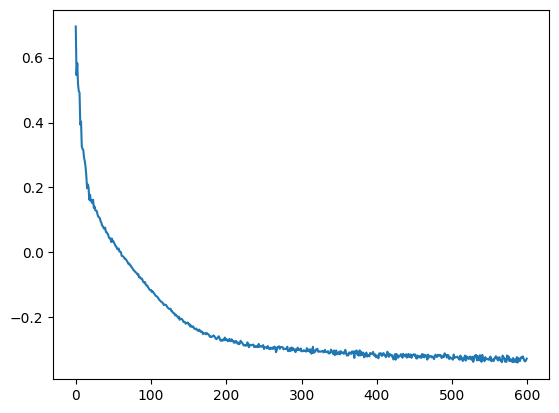

In [ ]:
nb_dist=3
weights=torch.ones((nb_dist))/nb_dist
n_epochs=600
reg=0.1
batch_size=4000
fs,gs=compute_duals(weights, n_epochs=n_epochs,input_d=2,output_d=1,device='cuda',dist1=['rect1','rect2','rect3'],dist2='Uni',batch_size=batch_size,reg=reg,lr=0.00001)

In [ ]:
# Geler les paramètres du modèle
for i in range(len(fs)):
  for param in fs[i].parameters():
    param.requires_grad_(False)

# Geler les paramètres du modèle
for j in range(len(gs)):
  for param in gs[i].parameters():
    param.requires_grad_(False)

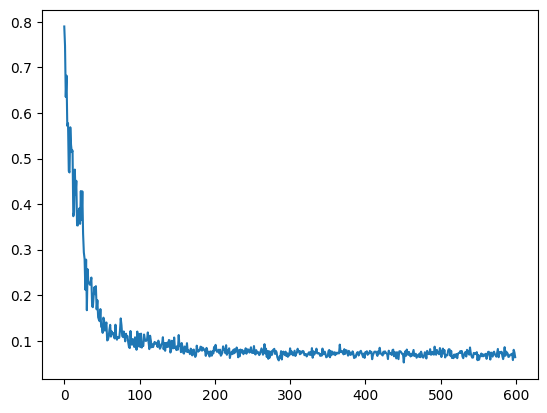

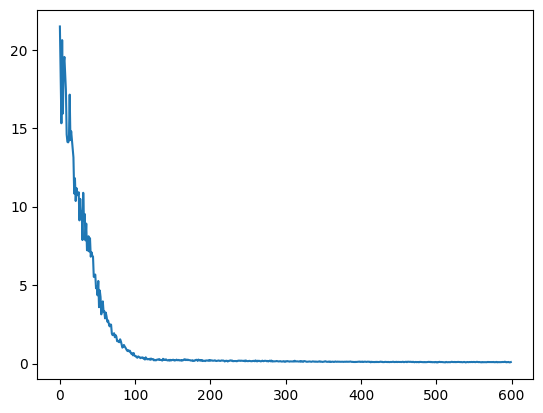

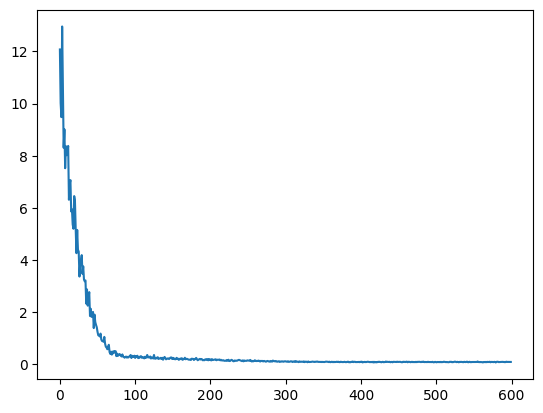

In [ ]:
Ts=learn_all_mapping(fs,gs,weights, n_epochs=n_epochs,input_d=2,output_d=2,device='cuda',dist1=['rect1','rect2','rect3'],dist2='Uni',batch_size=batch_size,reg=reg,lr=0.0001)

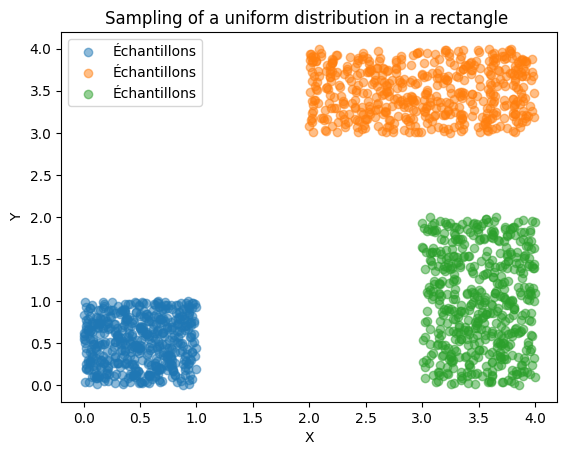

In [ ]:
# Définir les limites du rectangle
extent1= (0.0, 1.0, 0.0, 1.0)


extent2= (2.0, 4.0, 3.0, 4.0)

extent3= (3.0, 4.0, 0.0, 2.0)

# Créer un générateur de distribution uniforme sur le rectangle
sample_func1, pdf_func1 = uniform_rectangle_torch(extent1)
sample_func2, pdf_func2 = uniform_rectangle_torch(extent2)
sample_func3, pdf_func3 = uniform_rectangle_torch(extent3)

# Générer des échantillons
batch_size = 500
samples1= sample_func1(batch_size)
samples2= sample_func2(batch_size)
samples3= sample_func3(batch_size)



# Afficher les échantillons et la densité de probabilité
plt.scatter(samples1[:, 0], samples1[:, 1], label='Échantillons', alpha=0.5)
#plt.title('Échantillons d\'une distribution uniforme sur un rectangle')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.legend()
#plt.show()

plt.scatter(samples2[:, 0], samples2[:, 1], label='Échantillons', alpha=0.5)
#plt.title('Échantillons d\'une distribution uniforme sur un rectangle')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.legend()
#plt.show()

plt.scatter(samples3[:, 0], samples3[:, 1], label='Échantillons', alpha=0.5)
plt.title('Sampling of a uniform distribution in a rectangle ')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()




In [ ]:
s1=Ts[0](samples1.to(device))
s2=Ts[1](samples2.to(device))
s3=Ts[2](samples3.to(device))


In [ ]:
s=(s1+s2+s3)/3
s=s.cpu().detach().numpy()

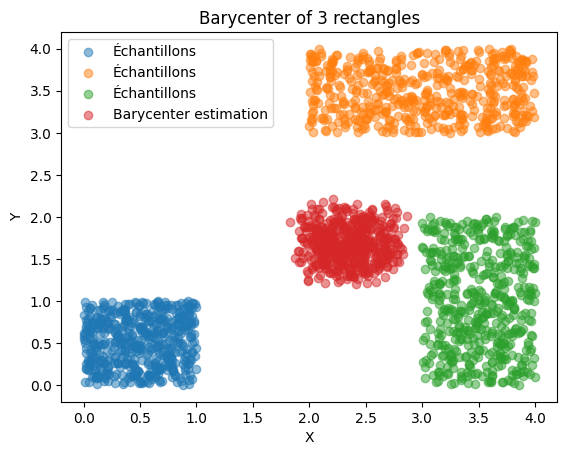

In [ ]:
plt.scatter(samples1[:, 0], samples1[:, 1], label='Échantillons', alpha=0.5)
plt.scatter(samples2[:, 0], samples2[:, 1], label='Échantillons', alpha=0.5)
plt.scatter(samples3[:, 0], samples3[:, 1], label='Échantillons', alpha=0.5)

plt.scatter(s[:, 0], s[:, 1], label='Barycenter estimation', alpha=0.5)
plt.title('Barycenter of 3 rectangles')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
def gradient_at(f, x):
  x.requires_grad_(True)
  y = f(x)
  grad = torch.autograd.grad(y, x,grad_outputs=torch.ones_like(y))[0]
  x.requires_grad_(False)
  return grad
v1= samples1.to(device)-0.5*gradient_at(fs[0], samples1.to(device))
#v1=v1-torch.mean(v1,axis=0) + torch.Tensor(mean0).to(device)
v1=v1.cpu().detach().numpy()

v2= samples2.to(device)-0.5*gradient_at(fs[1], samples2.to(device))
#v2=v2-torch.mean(v2,axis=0)+ torch.Tensor(mean1).to(device)
v2=v2.cpu().detach().numpy()

v3= samples3.to(device)-0.5*gradient_at(fs[2], samples3.to(device))

v3=v3.cpu().detach().numpy()



v=(v1+v2+v3)/3

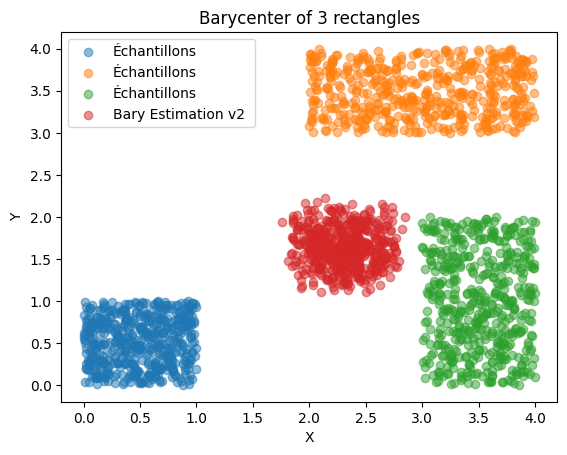

In [ ]:
plt.scatter(samples1[:, 0], samples1[:, 1], label='Échantillons', alpha=0.5)
plt.scatter(samples2[:, 0], samples2[:, 1], label='Échantillons', alpha=0.5)
plt.scatter(samples3[:, 0], samples3[:, 1], label='Échantillons', alpha=0.5)

plt.scatter(v[:, 0], v[:, 1], label='Bary Estimation v2 ', alpha=0.5)
plt.title('Barycenter of 3 rectangles')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

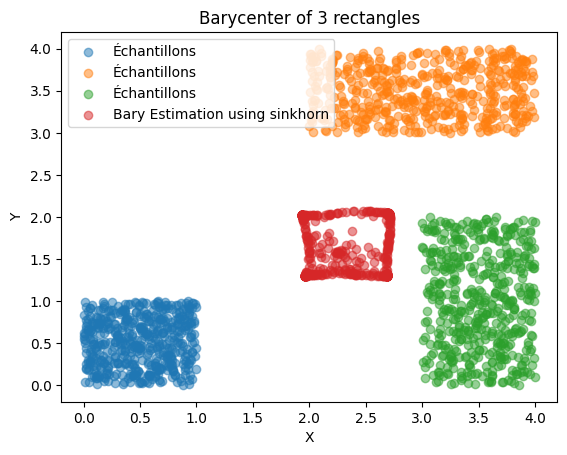

In [ ]:
weights = np.array(
    [1 / 3, 1 / 3, 1/3]
).astype(np.float32)
reg = 0.1  # Entropic Regularization
numItermax = 20  # Maximum number of iterations for the Barycenter algorithm
numInnerItermax = 1000  # Maximum number of sinkhorn iterations

n_shape=samples1.shape[0]

a1, a2, a3= ot.unif(n_shape), ot.unif(n_shape), ot.unif(n_shape)

XB_init = np.random.randn(n_shape, 2)
XB = ot.bregman.free_support_sinkhorn_barycenter(
        measures_locations=[samples1.numpy(), samples2.numpy(),samples3.numpy()],
        measures_weights=[a1,a2,a3],
        weights=weights,
        X_init=XB_init,
        reg=reg,
        numItermax=numItermax,
        numInnerItermax=numInnerItermax
    )

plt.scatter(samples1[:, 0], samples1[:, 1], label='Échantillons', alpha=0.5)
plt.scatter(samples2[:, 0], samples2[:, 1], label='Échantillons', alpha=0.5)
plt.scatter(samples3[:, 0], samples3[:, 1], label='Échantillons', alpha=0.5)

plt.scatter(XB[:, 0], XB[:, 1], label='Bary Estimation using sinkhorn', alpha=0.5)
plt.title('Barycenter of 3 rectangles')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Test en 1D

## avec des gaussiennes de même moyenne

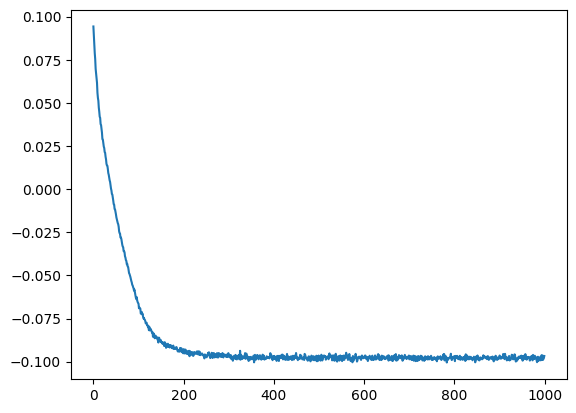

In [ ]:
nb_dist=6
batch_size=8000
n_epochs=1000
reg=0.1
weights=torch.ones((nb_dist))/nb_dist
fs,gs=compute_duals(weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gauss1','gauss2','gauss3','gauss4','gauss5','gauss6'],dist2='gauss1',batch_size=batch_size,reg=reg,lr=0.00001)

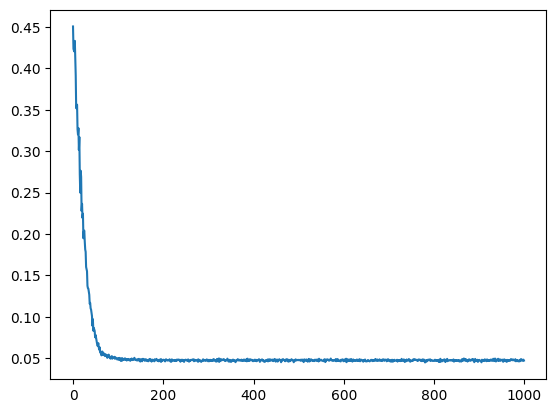

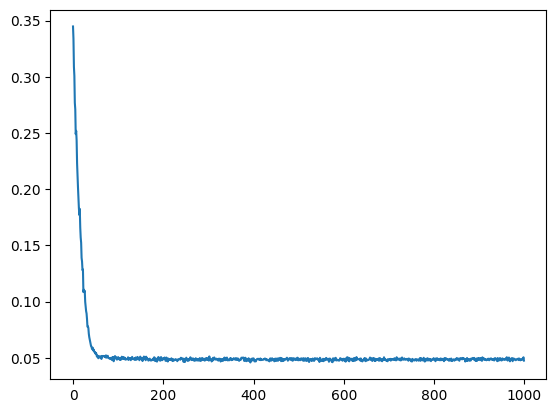

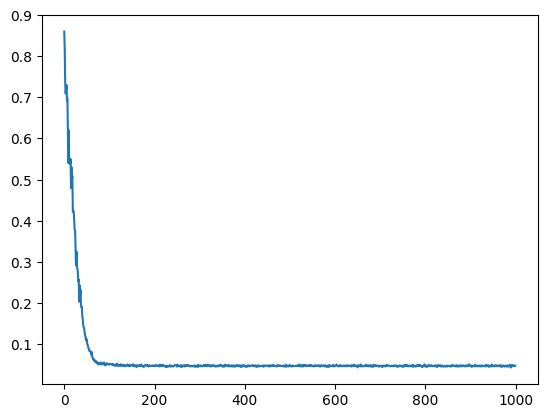

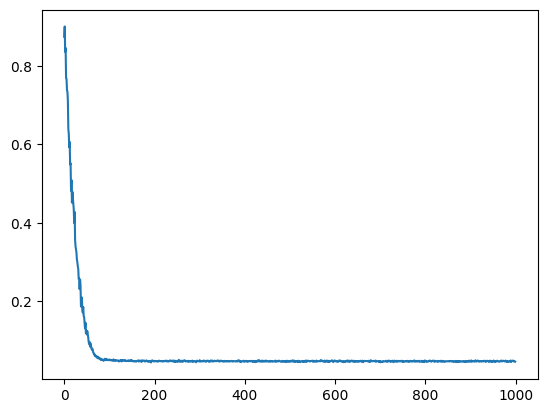

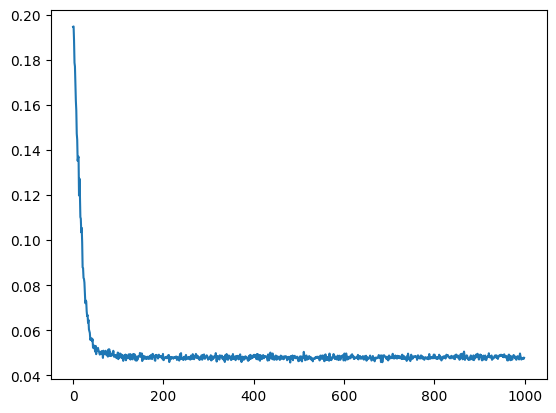

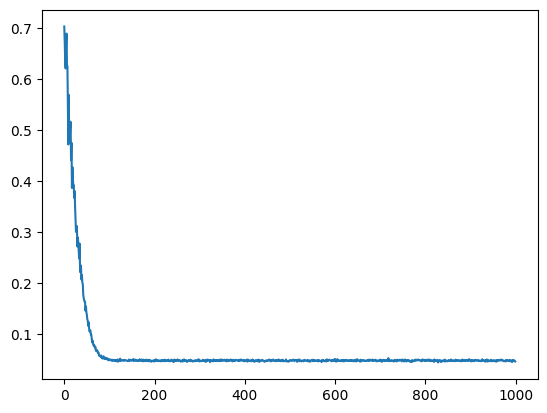

In [ ]:
#reg=0.1
#batch_size=300
Ts=learn_all_mapping(fs,gs,weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gauss1','gauss2','gauss3','gauss4','gauss5','gauss6'],dist2='gauss1',batch_size=batch_size,reg=reg,lr=0.0001)

In [ ]:
sample_size=5000
mean0=0
svd0=1
rvs,pdf1=gaussian_1d_np(mean0, svd0)
sample1=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean1=0
svd1=0.8
rvs,pdf2=gaussian_1d_np(mean1, svd1)
sample2=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean2=0
svd2=2
rvs,pdf3=gaussian_1d_np(mean2, svd2)
sample3=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean3=0
svd3=1.5
rvs,pdf4=gaussian_1d_np(mean3, svd3)
sample4=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean4=0
svd4=0.5
rvs,pdf5=gaussian_1d_np(mean4, svd4)
sample5=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean5=0
svd5=1.8
rvs,pdf6=gaussian_1d_np(mean5, svd5)
sample6=torch.Tensor(rvs(sample_size)).reshape(-1,1)


In [ ]:
s1=Ts[0](sample1.to(device))
s1=s1-torch.mean(s1)+torch.Tensor([mean0]).to(device)
s2=Ts[1](sample2.to(device))
s2=s2-torch.mean(s2)+torch.Tensor([mean1]).to(device)
s3=Ts[2](sample3.to(device))
s3=s3-torch.mean(s3) +torch.Tensor([mean2]).to(device)
s4=Ts[3](sample4.to(device))
s4=s4-torch.mean(s4) + torch.Tensor([mean3]).to(device)
s5=Ts[4](sample5.to(device))
s5=s5-torch.mean(s5) + torch.Tensor([mean4]).to(device)
s6=Ts[5](sample6.to(device))
s6=s6-torch.mean(s6) + torch.Tensor([mean5]).to(device)
s=s1#(s1+s2+s3+s4+s5+s6)/6
s=s.cpu().detach().numpy()

In [ ]:
print(np.var(s1.cpu().detach().numpy()))
print(np.var(s2.cpu().detach().numpy()))
print(np.var(s3.cpu().detach().numpy()))
print(np.var(s4.cpu().detach().numpy()))
print(np.var(s5.cpu().detach().numpy()))
print(np.var(s6.cpu().detach().numpy()))
print(np.var(s))

0.9028361719362558
0.5676881380676334
3.4721096563737897
1.989798271598645
0.2288298517051015
2.930562391605821
0.9028361719362558


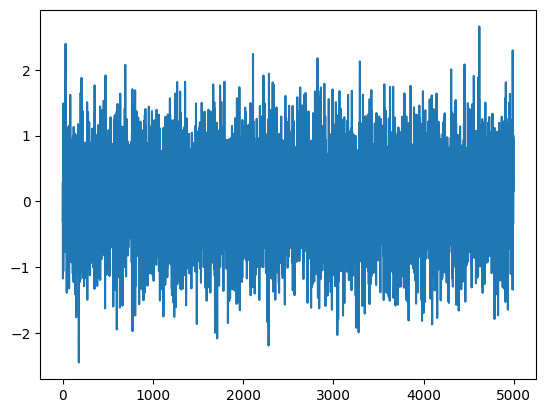

In [ ]:
plt.plot(s)

(array([0.00176044, 0.        , 0.00176044, 0.00528131, 0.00704175,
        0.01584393, 0.01584393, 0.04577135, 0.05105266, 0.08626138,
        0.11090749, 0.15843928, 0.19012713, 0.24998197, 0.3045555 ,
        0.3626499 , 0.39785863, 0.48412001, 0.49644306, 0.52461005,
        0.56510008, 0.46299477, 0.52637048, 0.57214183, 0.48940132,
        0.44715084, 0.44186954, 0.40490037, 0.3045555 , 0.26934677,
        0.22885673, 0.16019971, 0.14435578, 0.09330313, 0.05985484,
        0.03520873, 0.03696916, 0.02112524, 0.01232305, 0.00528131,
        0.00352087, 0.00352087, 0.00176044, 0.        , 0.00176044]),
 array([-2.4514731 , -2.33786491, -2.22425671, -2.11064852, -1.99704032,
        -1.88343213, -1.76982394, -1.65621574, -1.54260755, -1.42899935,
        -1.31539116, -1.20178296, -1.08817477, -0.97456658, -0.86095838,
        -0.74735019, -0.63374199, -0.5201338 , -0.4065256 , -0.29291741,
        -0.17930922, -0.06570102,  0.04790717,  0.16151537,  0.27512356,
         0.38873176, 

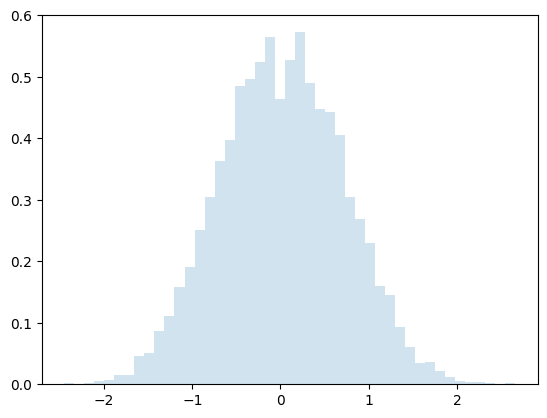

In [ ]:
plt.hist(s, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Histogram of the sample values' )

In [ ]:
estimated_mean = np.mean(s)
estimated_variance = np.var(s)
print('la moyenne estimé est :', estimated_mean)
print('la variance estimé est :', estimated_variance)
rvsest,pdfest=gaussian_1d_np(estimated_mean, estimated_variance)



la moyenne estimé est : -3.055333763768431e-17
la variance estimé est : 0.9028361719362558


In [ ]:
means=np.array([mean0,mean1,mean2,mean3,mean4,mean5]).reshape(-1,1)
Covs=np.array([np.array([[svd0]]),np.array([[svd1]]),np.array([[svd2]]),np.array([[svd3]]),np.array([[svd4]]),np.array([[svd5]])])
wh=np.ones((nb_dist))/nb_dist
true_mean,true_var=ot.gaussian.bures_wasserstein_barycenter(means, Covs, wh)
rvst,pdft=gaussian_1d_np(true_mean, true_var)
print('la vraie variance',true_var )

la vraie variance [[1.20345758]]


In [ ]:
def gradient_at(f, x):
  x.requires_grad_(True)
  y = f(x)
  grad = torch.autograd.grad(y, x,grad_outputs=torch.ones_like(y))[0]
  x.requires_grad_(False)
  return grad
v1= sample1.to(device)-0.5*gradient_at(fs[0], sample1.to(device))
#v1=v1-torch.mean(v1) + torch.Tensor(mean0).to(device)
v1=v1.cpu().detach().numpy()

v2= sample2.to(device)-0.5*gradient_at(fs[1], sample2.to(device))
#v2=v2-torch.mean(v2)+ torch.Tensor(mean1).to(device)
v2=v2.cpu().detach().numpy()

v3= sample3.to(device)-0.5*gradient_at(fs[2], sample3.to(device))
#v3=v3-torch.mean(v3)+ torch.Tensor(mean2).to(device)
v3=v3.cpu().detach().numpy()

v4= sample4.to(device)-0.5*gradient_at(fs[3], sample4.to(device))
#v4=v4-torch.mean(v4)+ torch.Tensor(mean3).to(device)
v4=v4.cpu().detach().numpy()

v5= sample5.to(device)-0.5*gradient_at(fs[4], sample5.to(device))
#v5=v5-torch.mean(v5) + torch.Tensor(mean4).to(device)
v5=v5.cpu().detach().numpy()

v6= sample6.to(device)-0.5*gradient_at(fs[5], sample6.to(device))
#v6=v6-torch.mean(v6)+ torch.Tensor(mean5).to(device)
v6=v6.cpu().detach().numpy()

v=(v1+v2+v3+v4+v5+v6)/6
#v=v2

In [ ]:
print('la variance estimé v2', np.var(v1))
print('la variance estimé v2', np.var(v2))
print('la variance estimé v2', np.var(v3))
print('la variance estimé v2', np.var(v4))
print('la variance estimé v2', np.var(v5))
print('la variance estimé v2', np.var(v6))
print('la variance estimé v2', np.var(v))
rvsest,pdfest2=gaussian_1d_np(true_mean, np.var(v1))


la variance estimé v2 0.99849725
la variance estimé v2 0.6244476
la variance estimé v2 3.8973386
la variance estimé v2 2.2081473
la variance estimé v2 0.25178608
la variance estimé v2 3.2714553
la variance estimé v2 0.31561518


In [ ]:
# Gaussian distributions
n = 1000 # nb bins

# bin positions
#x = np.arange(n, dtype=np.float64)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

a1 = pdf1(x)#ot.datasets.make_1D_gauss(n, m=0, s=1)  # m= mean, s= std
a2 = pdf2(x)#ot.datasets.make_1D_gauss(n, m=0, s=0.8)
a3 = pdf3(x)#ot.datasets.make_1D_gauss(n, m=0, s=2)  # m= mean, s= std
a4 = pdf4(x)#ot.datasets.make_1D_gauss(n, m=0, s=1.5)
a5 = pdf5(x)#ot.datasets.make_1D_gauss(n, m=0, s=0.5)  # m= mean, s= std
a6 = pdf6(x)#ot.datasets.make_1D_gauss(n, m=0, s=1.8)


# creating matrix A containing all distributions
A = np.vstack((a1, a2,a3,a4,a5,a6)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

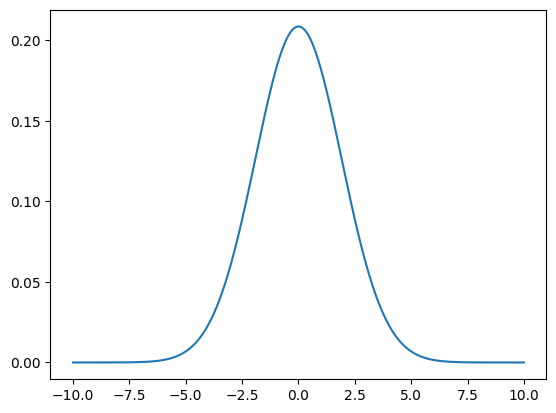

In [ ]:
alpha = 0.2  # 0<=alpha<=1
weights = np.array([1 /6, 1/6,1 /6, 1/6,1/6, 1/6])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-2
bary_wass = ot.bregman.barycenter(A, M, reg, weights)
plt.plot(x,bary_wass)

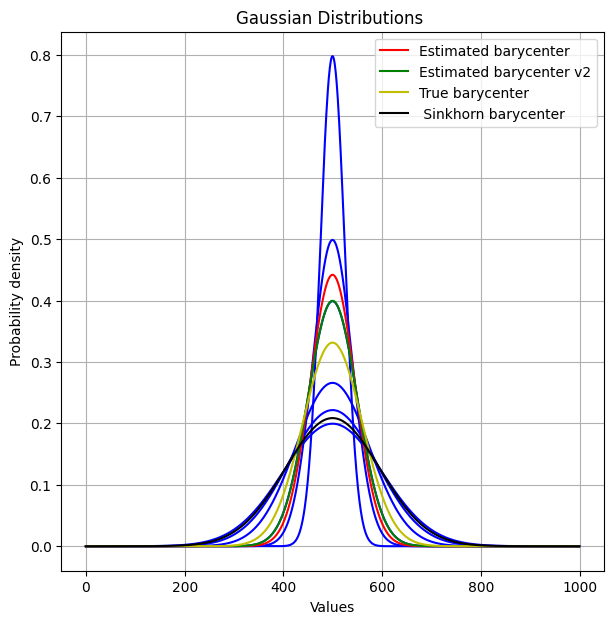

In [ ]:
mu=0
sigma=2.5
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y1=pdf1(x)
y2=pdf2(x)
y3=pdf3(x)
y4=pdf4(x)
y5=pdf5(x)
y6=pdf6(x)
y_est=pdfest(x)
y_est2=pdfest2(x)
y_true=pdft(x)
plt.figure(figsize=(7,7))
plt.plot( y1,color='b')
plt.plot( y2,color='b')
plt.plot( y3,color='b')
plt.plot( y4,color='b')
plt.plot( y5,color='b')
plt.plot( y6, color='b')
plt.plot( y_est,color='r',label='Estimated barycenter')
plt.plot( y_est2,color='g',label='Estimated barycenter v2')
plt.plot( y_true[0,:],color='y',label='True barycenter')
plt.plot( bary_wass,color='k',label=' Sinkhorn barycenter')

    # Légende et titre du graphique
plt.legend()
plt.title('Gaussian Distributions ')
plt.xlabel('Values')
plt.ylabel('Probability density')
plt.grid(True)
plt.show()

In [ ]:
print('The difference between true variance and estimated variance v2',np.abs(np.var(v1) - true_var)[0][0])
print('The difference between true variance and estimated variance',np.abs(np.var(s) - true_var)[0][0])
print('The difference between true variance and sinkhorn variance',np.abs(1.9- true_var)[0][0])

The difference between true variance and estimated variance v2 0.20496033198250085
The difference between true variance and estimated variance 0.30062140774216795
The difference between true variance and sinkhorn variance 0.6965424203215762


In [ ]:
np.var(v1)

0.99849725

Moyenne estimée (mu) : -4.9048187668025645e-09
Variance estimée (sigma^2) : 3.657671978414888


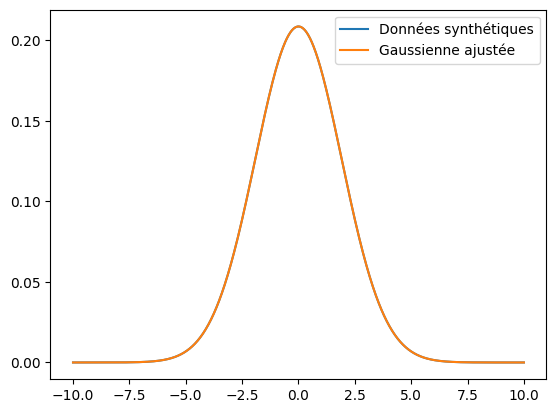

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définir la fonction de densité gaussienne
def gaussian_pdf(x, mu, sigma_sq):
    return 1 / np.sqrt(2 * np.pi * sigma_sq) * np.exp(-(x - mu)**2 / (2 * sigma_sq))

# Générer des données synthétiques
#mu_true = 2.0
#sigma_true = 1.5
x_data = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
#y_data = gaussian_pdf(x_data, mu_true, sigma_true**2)

# Ajouter un bruit gaussien aux données synthétiques (facultatif)
#np.random.seed(42)
#y_data += np.random.normal(0, 0.1, size=len(x_data))

# Ajuster les paramètres de la gaussienne aux données
params, covariance = curve_fit(gaussian_pdf, x_data, bary_wass, p0=[1.0, 1.0])

# Extraire les paramètres ajustés
mu_fit, sigma_sq_fit = params

# Afficher les résultats
print("Moyenne estimée (mu) :", mu_fit)
print("Variance estimée (sigma^2) :", sigma_sq_fit)

# Tracer la gaussienne ajustée
plt.plot(x_data, bary_wass, label='Données synthétiques')
plt.plot(x_data, gaussian_pdf(x_data, mu_fit, sigma_sq_fit), label='Gaussienne ajustée')
plt.legend()
plt.show()


## test comparaison

0.6433182263887203
0.45256937580540724


<ipython-input-10-53a06303e528>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


0.3201732850418342
0.2388345439392252


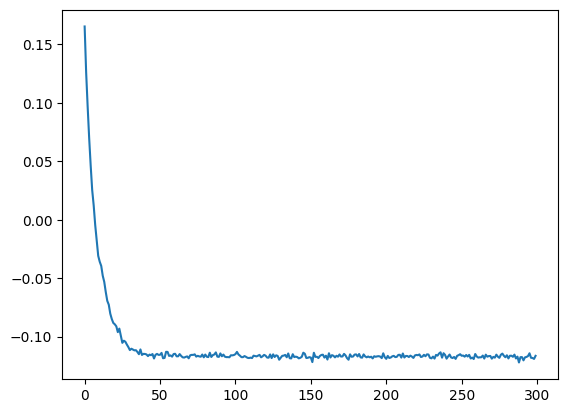

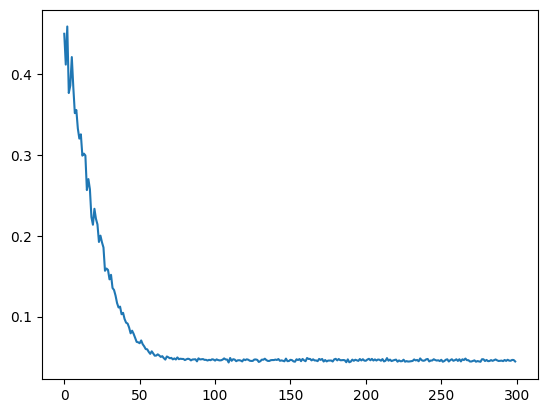

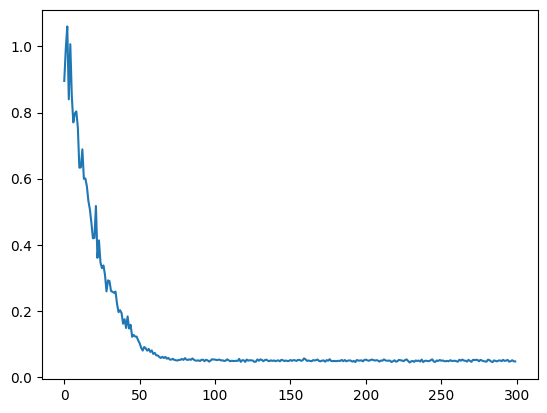

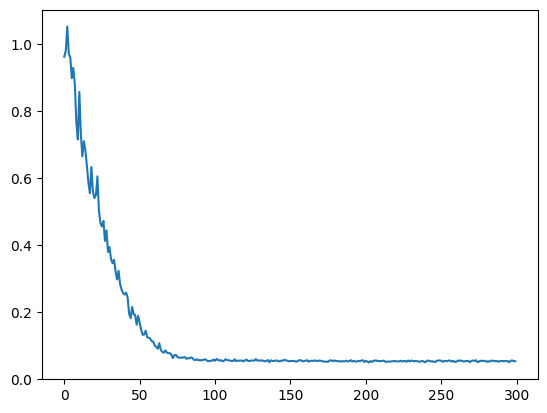

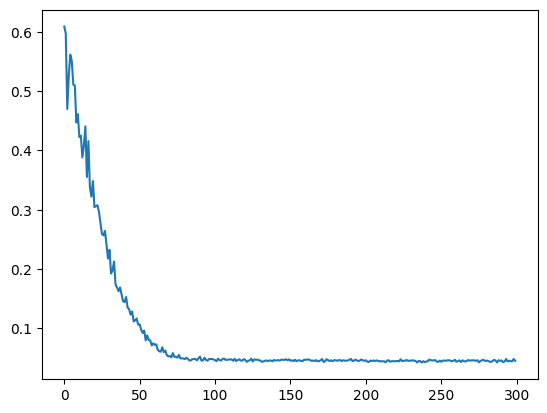

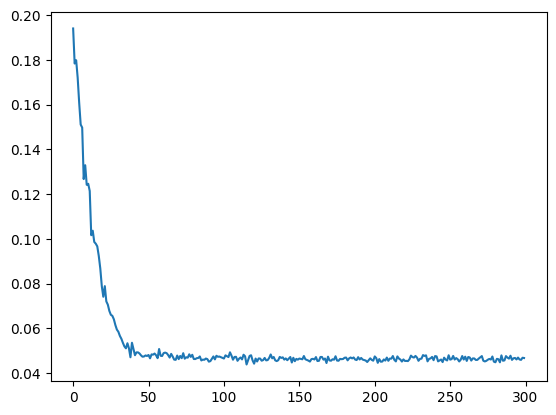

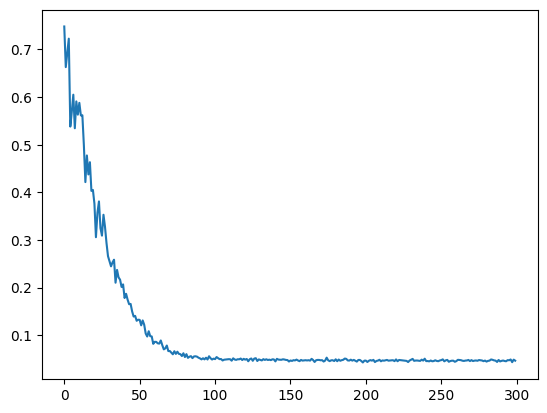

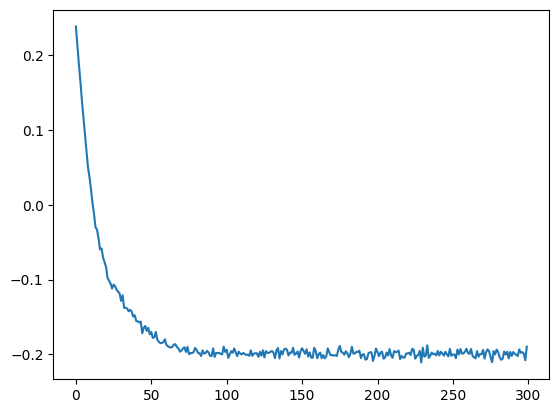

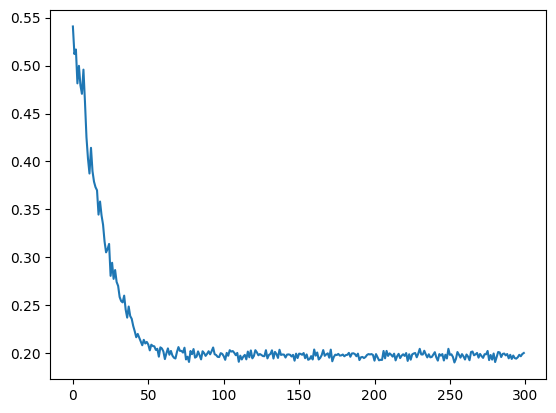

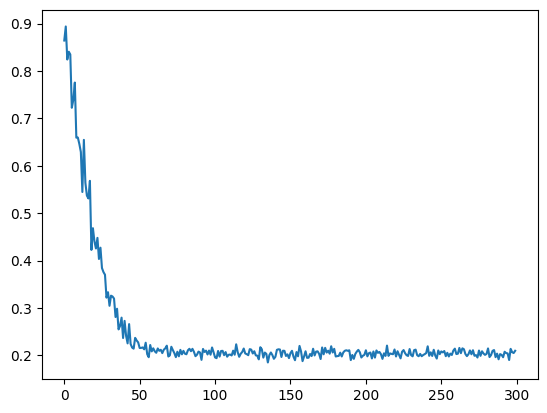

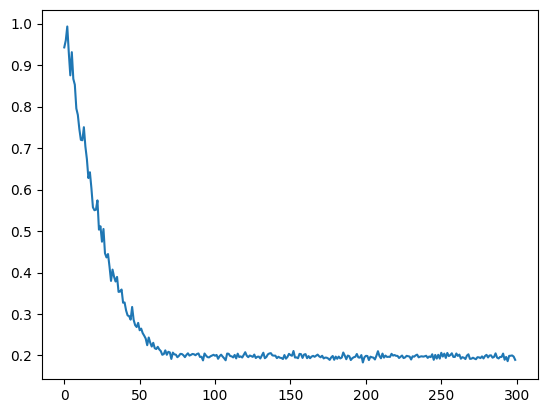

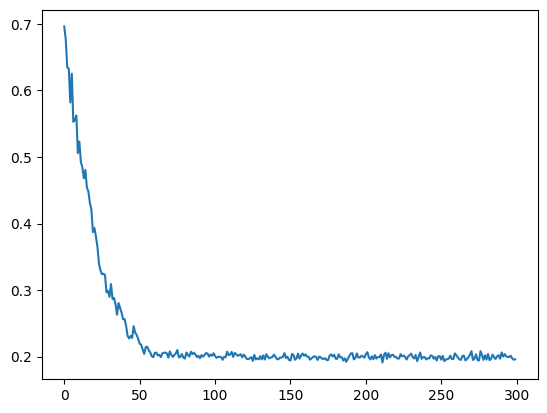

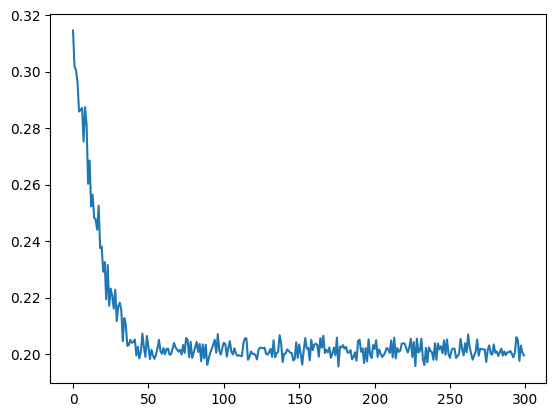

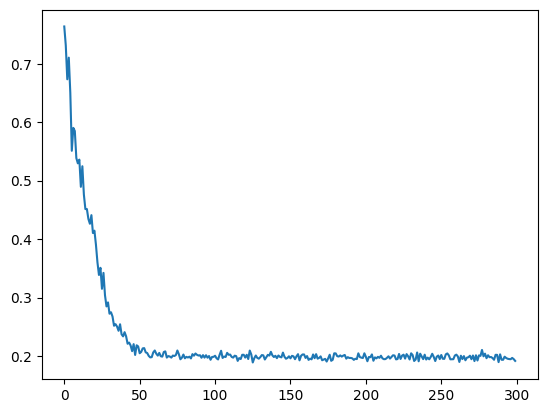

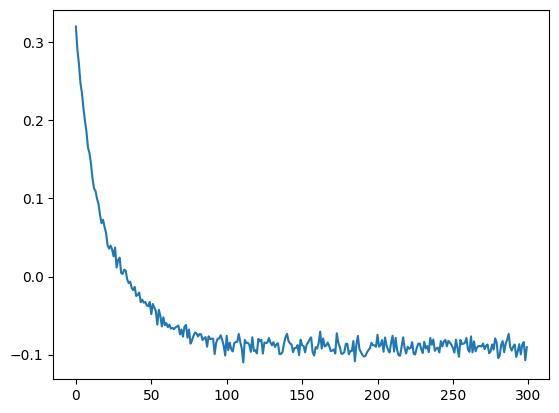

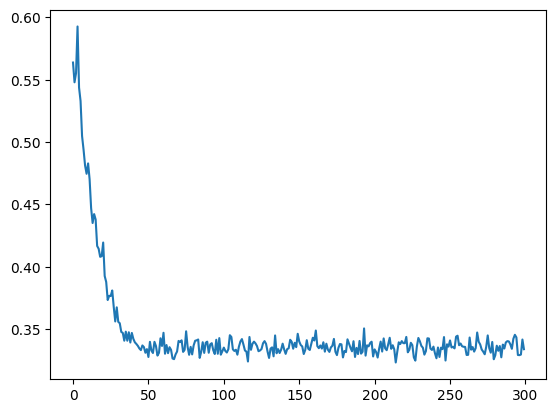

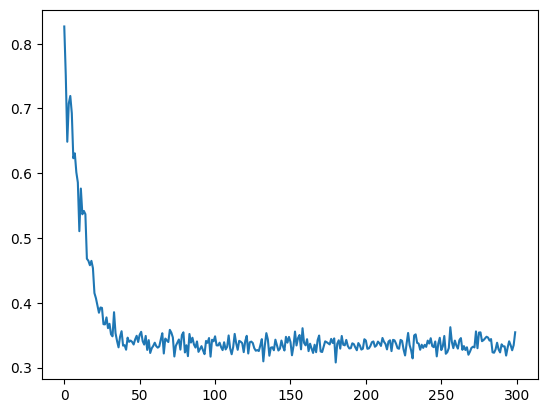

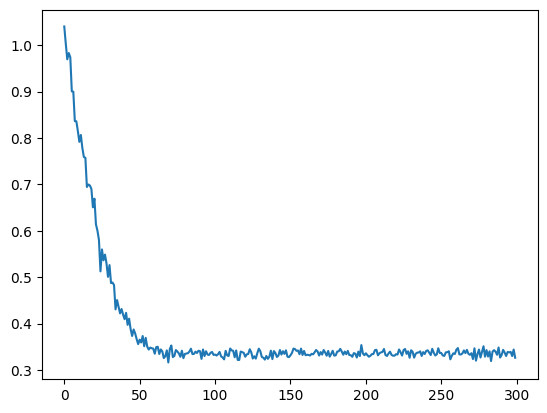

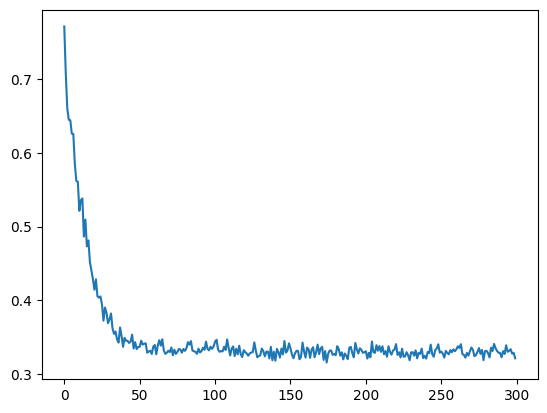

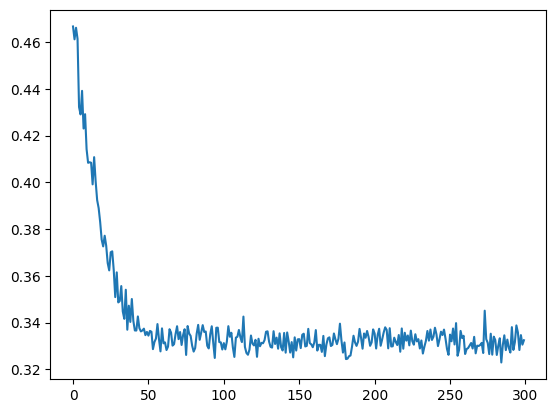

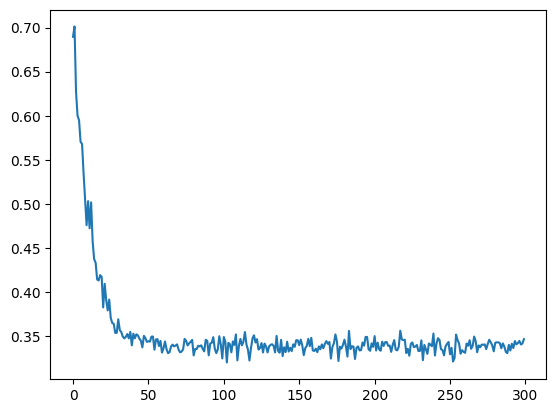

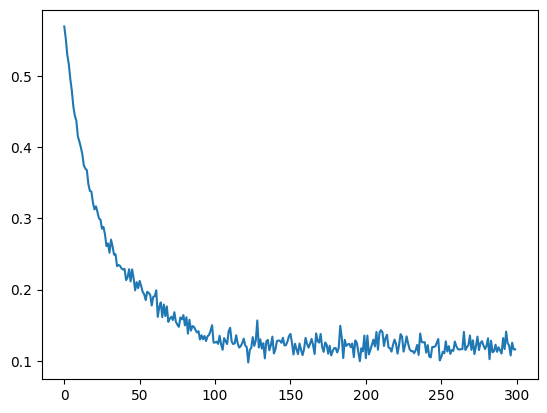

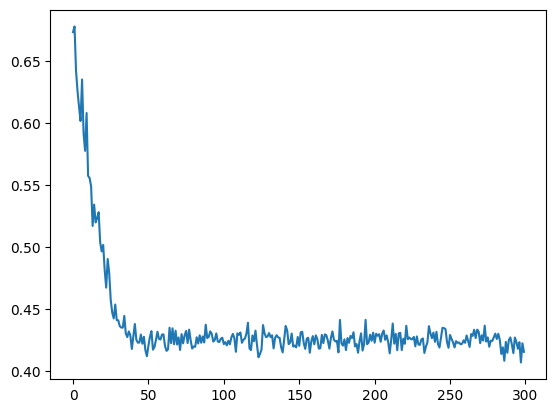

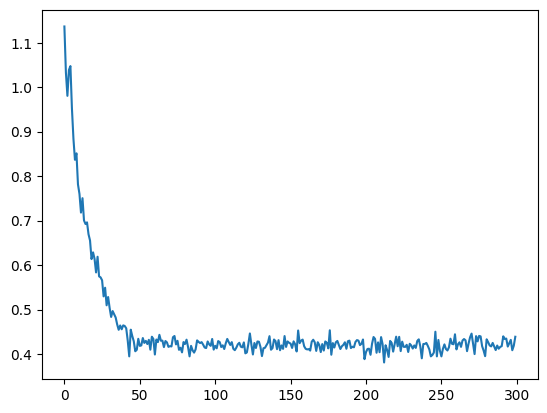

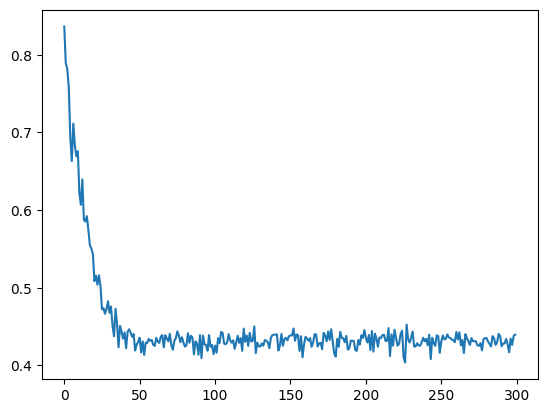

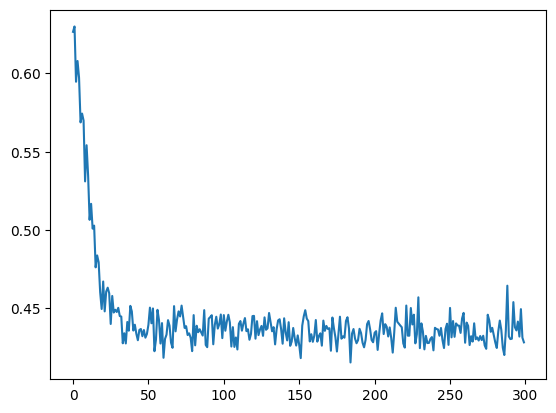

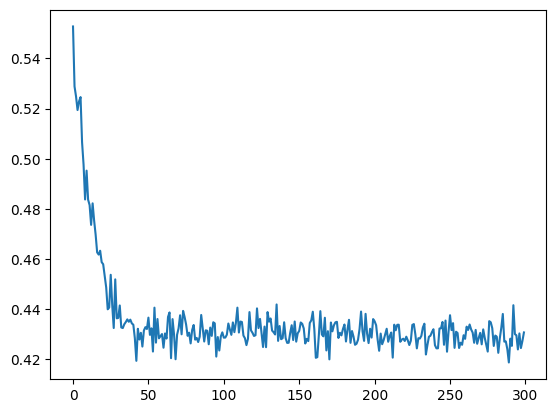

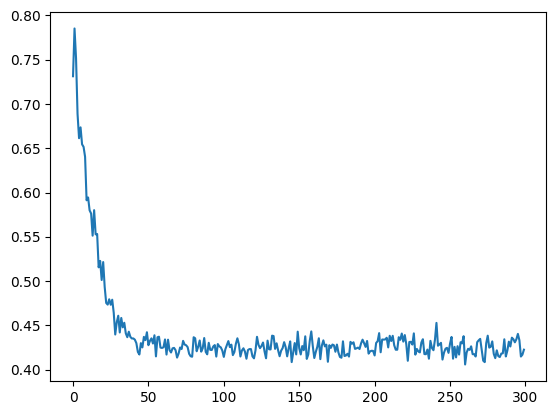

In [ ]:
regs=[0.1,0.5,1,1.5]
nb_dist=6
batch=5000
n_epochs=300
#regs=0.1

weights=torch.ones((nb_dist))/nb_dist

means_est=[]
var_est=[]

for reg in regs:
  fs,gs=compute_duals(weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gauss1','gauss2','gauss3','gauss4','gauss5','gauss6'],dist2='gauss1',batch_size=batch,reg=reg,lr=0.0001)
  Ts=learn_all_mapping(fs,gs,weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gauss1','gauss2','gauss3','gauss4','gauss5','gauss6'],dist2='gauss1',batch_size=batch,reg=reg,lr=0.0001)
  s1=Ts[0](sample1.to(device))
  s2=Ts[1](sample2.to(device))
  s3=Ts[2](sample3.to(device))
  s4=Ts[3](sample4.to(device))
  s5=Ts[4](sample5.to(device))
  s6=Ts[5](sample6.to(device))
  s=(s1+s2+s3+s4+s5+s6)/6
  s=s.cpu().detach().numpy()
  estimated_mean = np.mean(s)

  estimated_variance = np.var(s)
  print(estimated_variance)
  means_est.append(estimated_mean)
  var_est.append(estimated_variance)


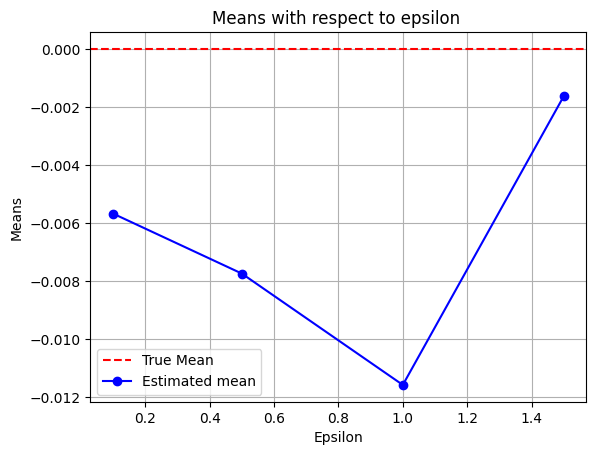

In [ ]:
plt.axhline(y=true_mean, color='r', linestyle='--', label='True Mean')
plt.plot(regs, means_est, marker='o', linestyle='-', color='b',label='Estimated mean')
plt.title('Means with respect to epsilon ')
plt.xlabel('Epsilon')
plt.ylabel('Means')
plt.grid(True)
plt.legend()
plt.show()

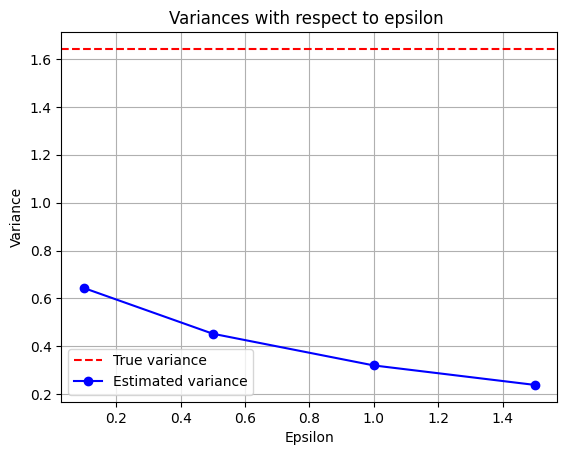

In [ ]:
plt.axhline(y=true_var, color='r', linestyle='--', label='True variance')
plt.plot(regs, var_est, marker='o', linestyle='-', color='b',label='Estimated variance')
plt.title('Variances with respect to epsilon ')
plt.xlabel('Epsilon')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

0.5685635675270013
0.6070022687214484


<ipython-input-10-53a06303e528>:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


0.6186312313404343
0.6523040442887074


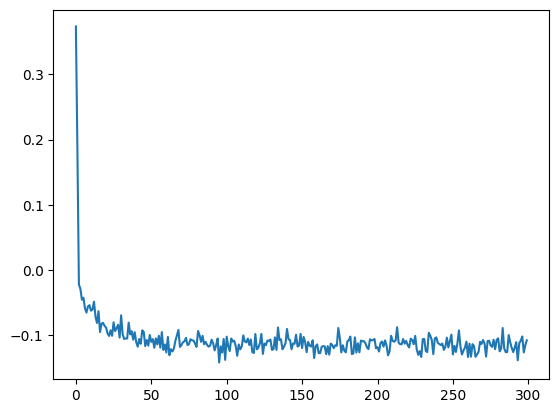

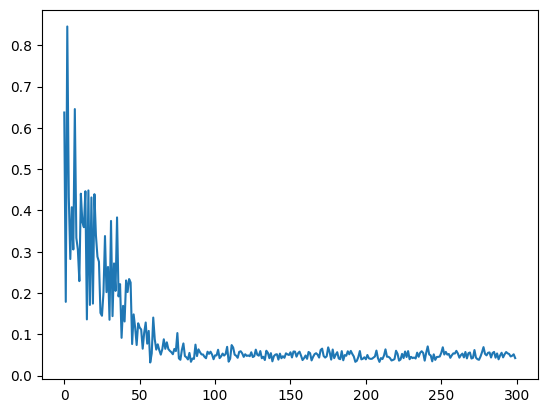

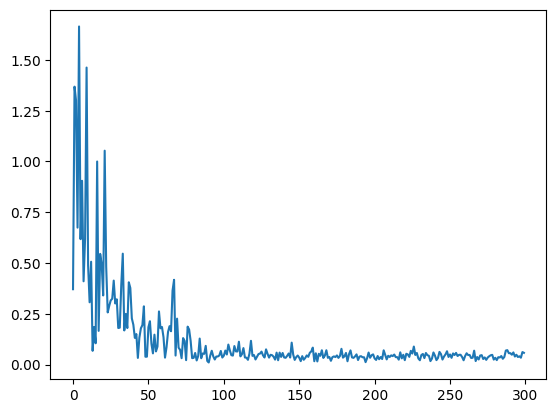

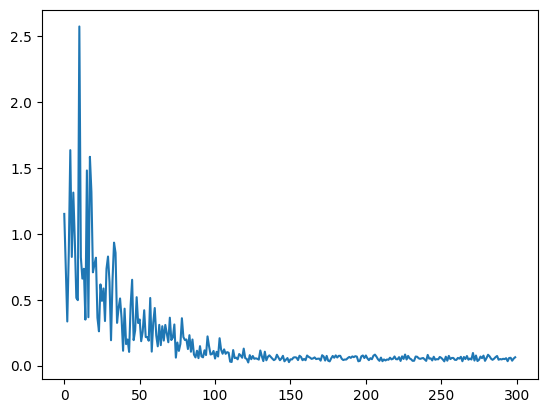

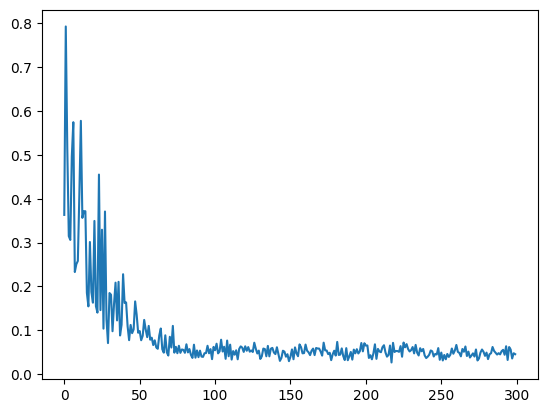

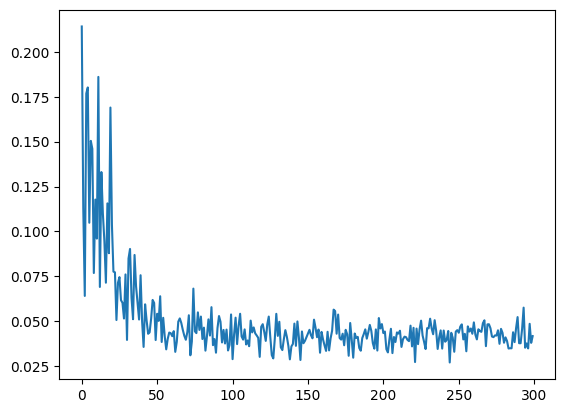

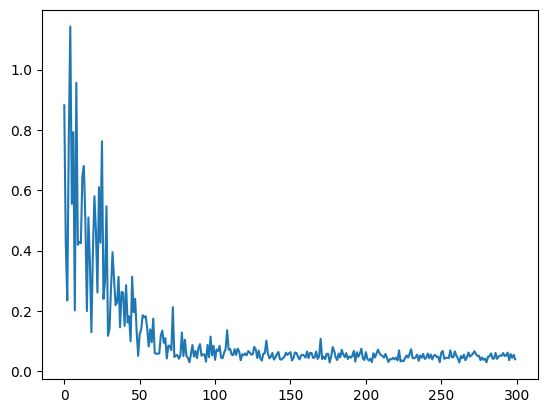

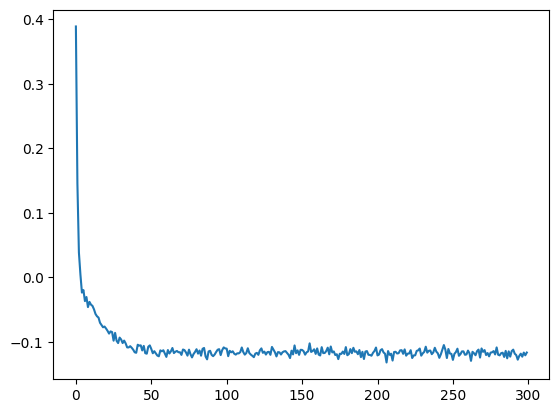

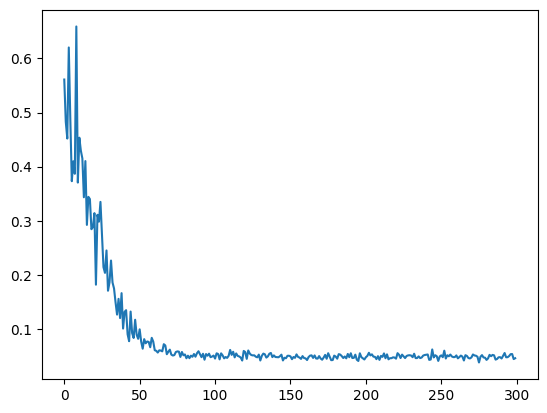

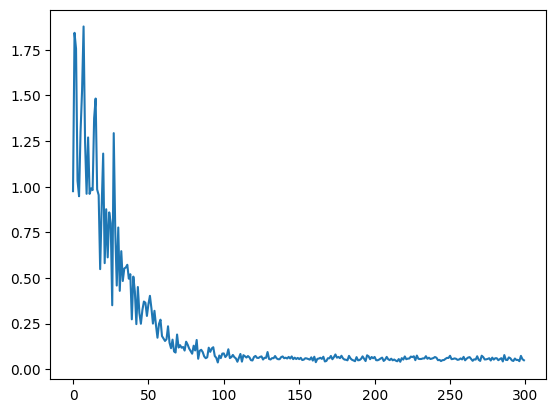

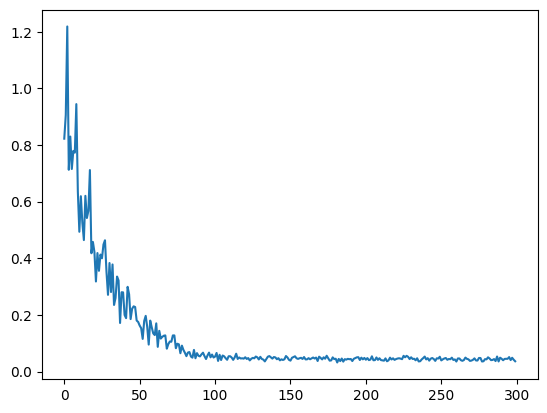

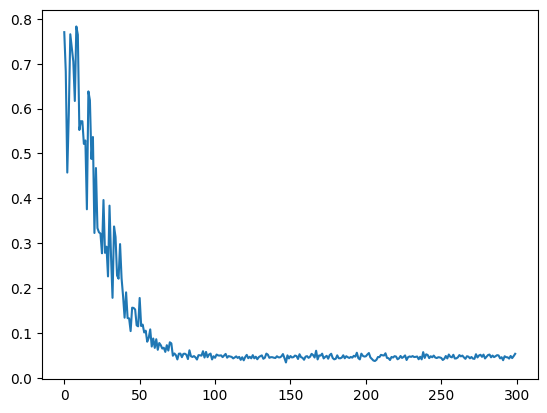

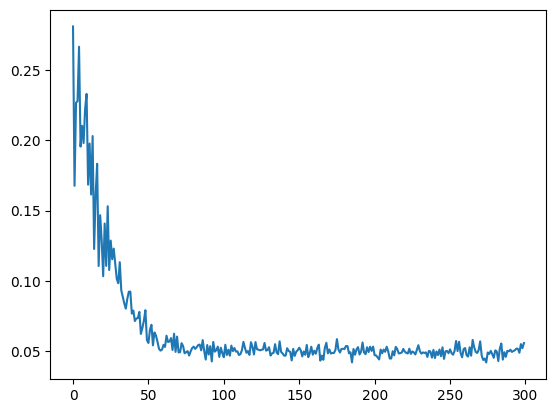

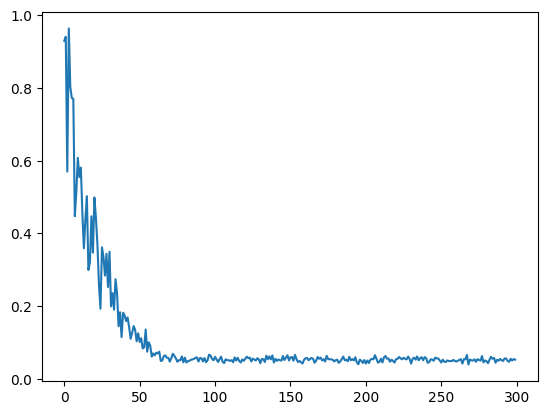

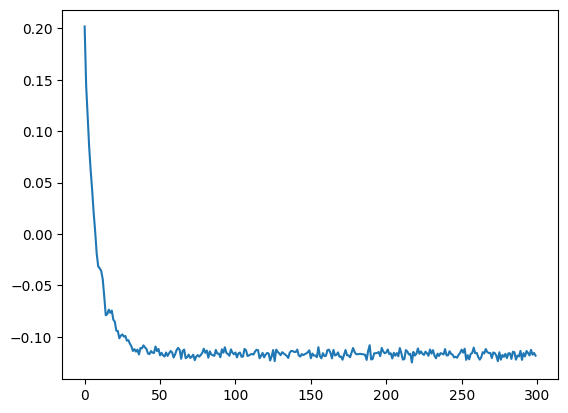

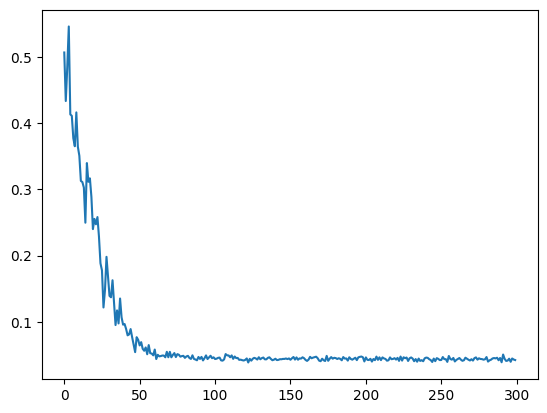

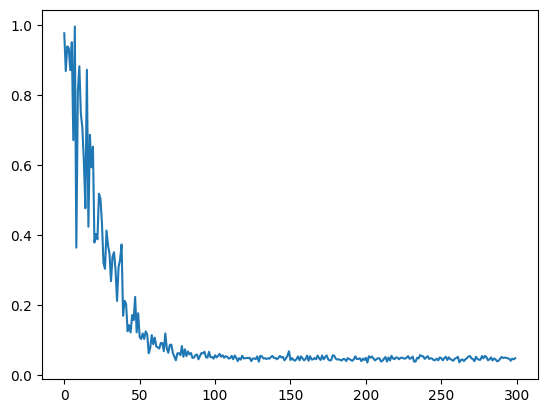

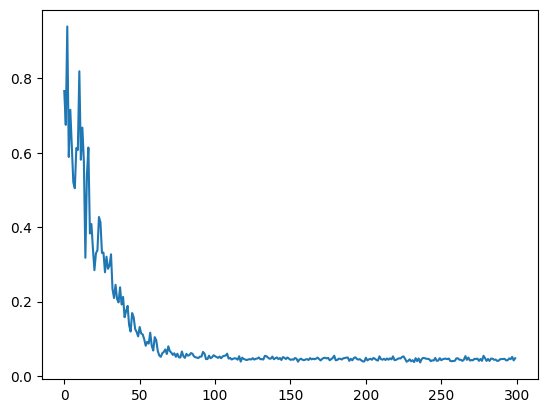

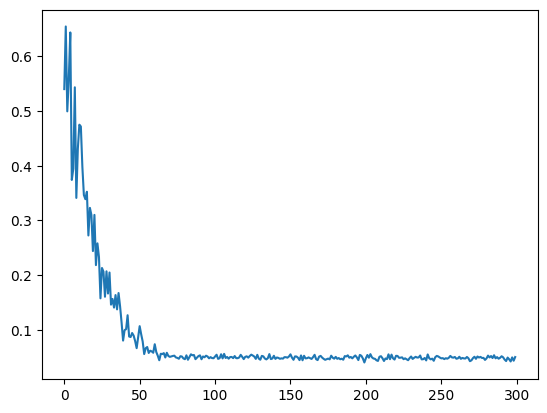

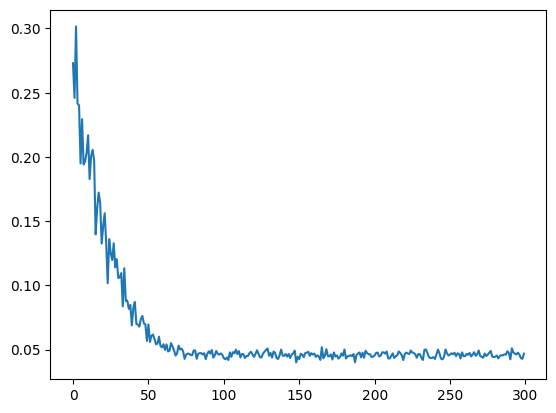

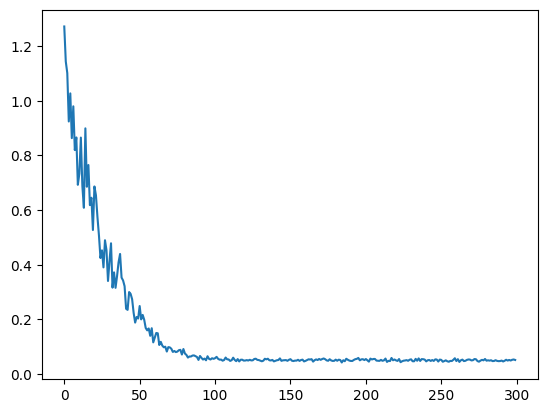

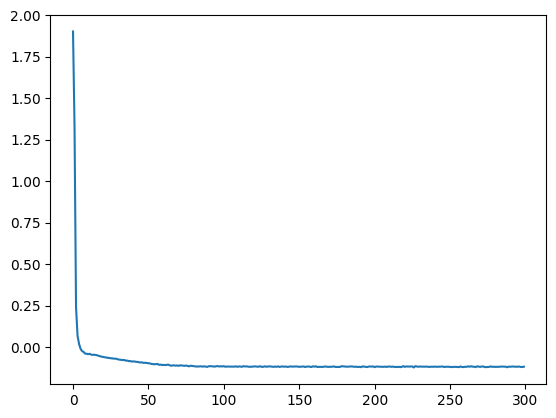

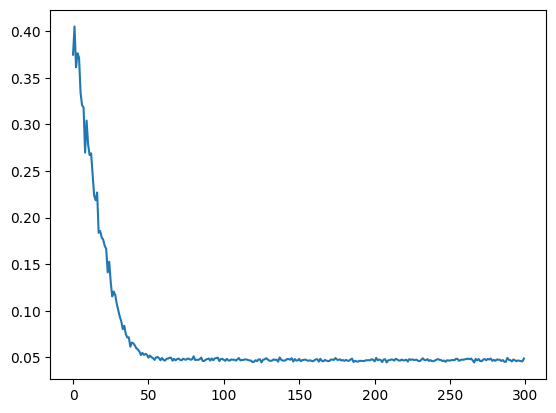

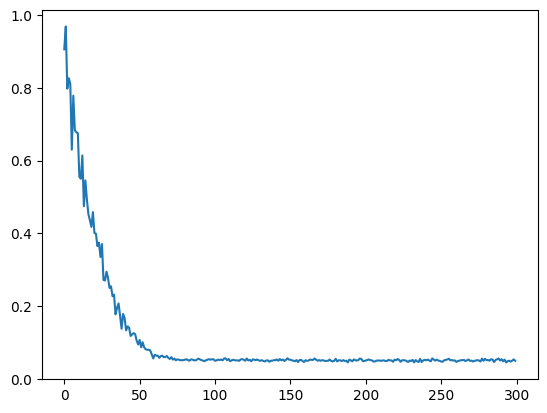

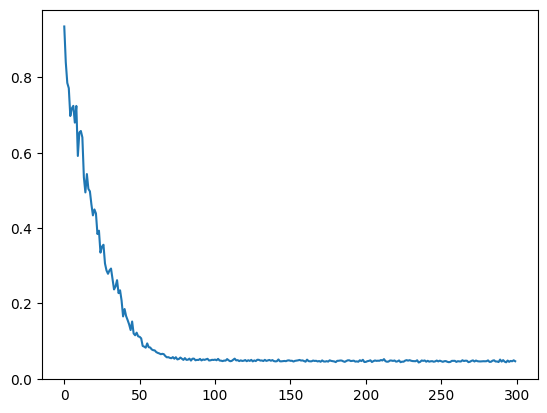

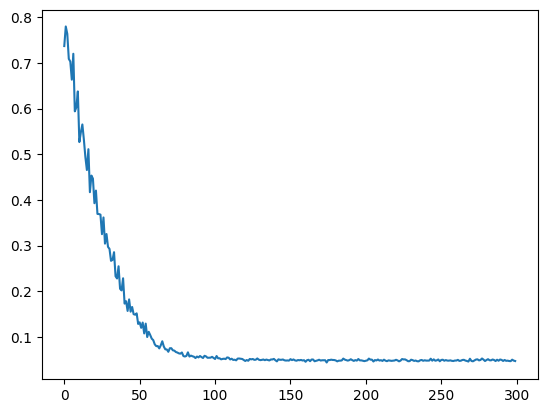

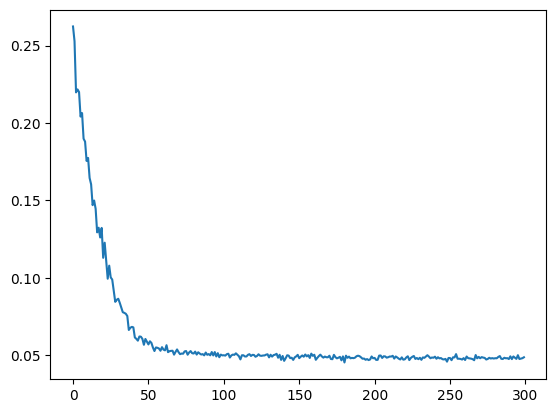

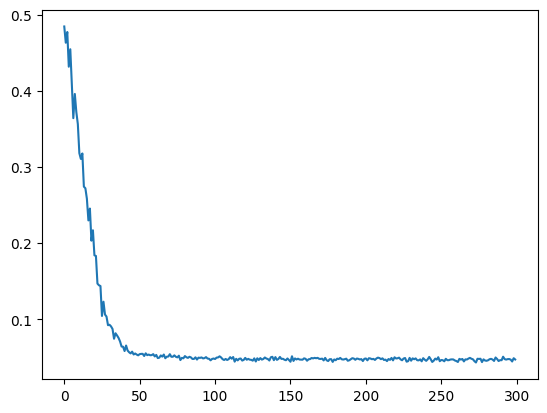

In [ ]:
batch_sizes=[100,500,1000,5000]
nb_dist=6
#batch_size=10000
n_epochs=300
reg=0.1

weights=torch.ones((nb_dist))/nb_dist

means_est=[]
var_est=[]

for batch in batch_sizes:
  fs,gs=compute_duals(weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gauss1','gauss2','gauss3','gauss4','gauss5','gauss6'],dist2='gauss1',batch_size=batch,reg=reg,lr=0.0001)
  Ts=learn_all_mapping(fs,gs,weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gauss1','gauss2','gauss3','gauss4','gauss5','gauss6'],dist2='gauss1',batch_size=batch,reg=reg,lr=0.0001)
  s1=Ts[0](sample1.to(device))
  s2=Ts[1](sample2.to(device))
  s3=Ts[2](sample3.to(device))
  s4=Ts[3](sample4.to(device))
  s5=Ts[4](sample5.to(device))
  s6=Ts[5](sample6.to(device))
  s=(s1+s2+s3+s4+s5+s6)/6
  s=s.cpu().detach().numpy()
  estimated_mean = np.mean(s)

  estimated_variance = np.var(s)
  print(estimated_variance)
  means_est.append(estimated_mean)
  var_est.append(estimated_variance)



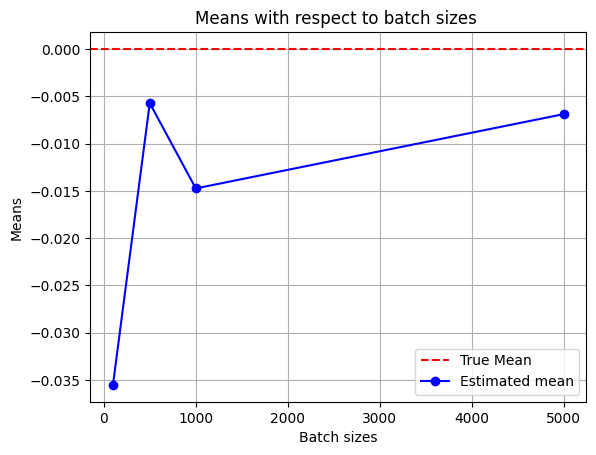

In [ ]:
plt.axhline(y=true_mean, color='r', linestyle='--', label='True Mean')
plt.plot(batch_sizes, means_est, marker='o', linestyle='-', color='b',label='Estimated mean')
plt.title('Means with respect to batch sizes ')
plt.xlabel('Batch sizes')
plt.ylabel('Means')
plt.grid(True)
plt.legend()
plt.show()

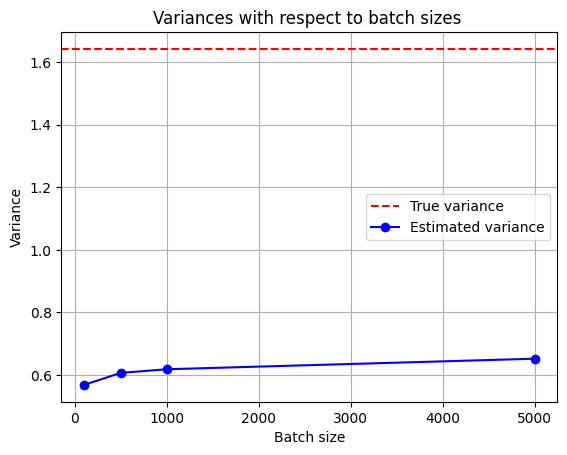

In [ ]:
plt.axhline(y=true_var, color='r', linestyle='--', label='True variance')
plt.plot(batch_sizes, var_est, marker='o', linestyle='-', color='b',label='Estimated variance')
plt.title('Variances with respect to batch sizes ')
plt.xlabel('Batch size')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
var_est

[0.24668113878192124,
 0.24947846212389677,
 0.24358445751514474,
 0.23669354832386133]

## Test avec des gaussiennes de moyennes différentes


In [ ]:
sample_size=5000
mean0=0
svd0=1
rvs,pdf1=gaussian_1d_np(mean0, svd0)
sample1=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean1=10
svd1=2
rvs,pdf2=gaussian_1d_np(mean1, svd1)
sample2=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean2=5
svd2=2
rvs,pdf3=gaussian_1d_np(mean2, svd2)
sample3=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean3=-10
svd3=1.5
rvs,pdf4=gaussian_1d_np(mean3, svd3)
sample4=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean4=-1
svd4=0.5
rvs,pdf5=gaussian_1d_np(mean4, svd4)
sample5=torch.Tensor(rvs(sample_size)).reshape(-1,1)
mean5=-5
svd5=1.8
rvs,pdf6=gaussian_1d_np(mean5, svd5)
sample6=torch.Tensor(rvs(sample_size)).reshape(-1,1)

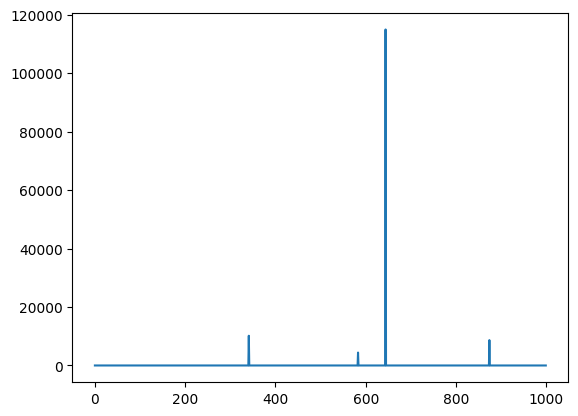

In [ ]:
nb_dist=6
batch_size=8000
n_epochs=1000
reg=0.1
weights=torch.ones((nb_dist))/nb_dist
fs,gs=compute_duals(weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gaussm1','gaussm2','gaussm3','gaussm4','gaussm5','gaussm6'],dist2='gaussm1',batch_size=batch_size,reg=reg,lr=0.00001)

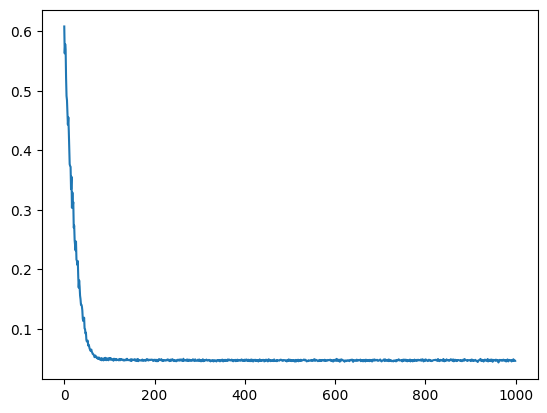

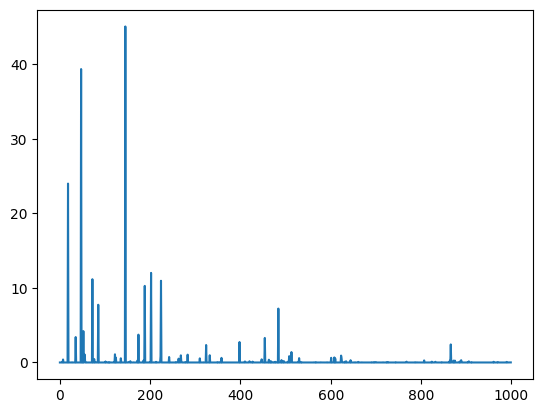

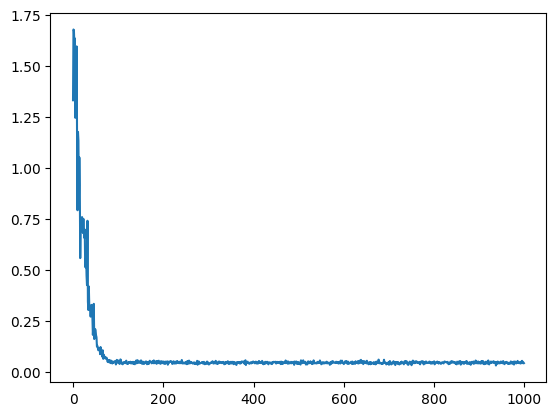

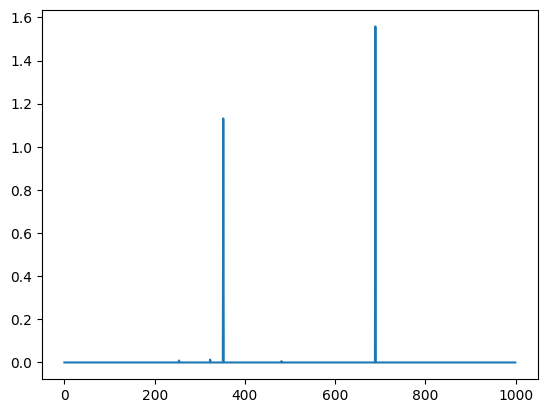

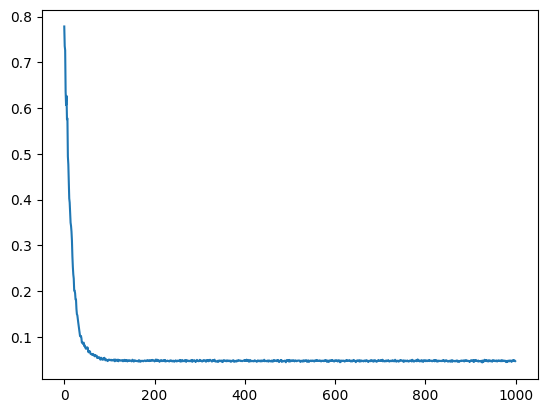

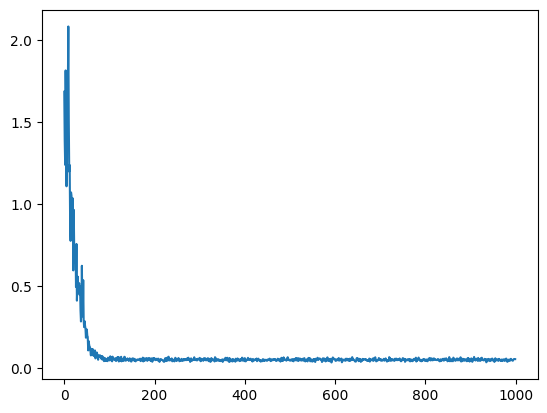

In [ ]:
Ts=learn_all_mapping(fs,gs,weights, n_epochs=n_epochs,input_d=1,output_d=1,device='cuda',dist1=['gaussm1','gaussm2','gaussm3','gaussm4','gaussm5','gaussm6'],dist2='gaussm1',batch_size=batch_size,reg=reg,lr=0.0001)

In [ ]:
s1=Ts[0](sample1.to(device))
#s1=s1-torch.mean(s1)
s2=Ts[1](sample2.to(device))
#s2=s2-torch.mean(s2)
s3=Ts[2](sample3.to(device))
#s3=s3-torch.mean(s3)
s4=Ts[3](sample4.to(device))
#s4=s4-torch.mean(s4)
s5=Ts[4](sample5.to(device))
#s5=s5-torch.mean(s5)
s6=Ts[5](sample6.to(device))
#s6=s6-torch.mean(s6)
s=s1#(s1+s2+s3+s4+s5+s6)/6
s=s.cpu().detach().numpy()

In [ ]:
print(np.var(s1.cpu().detach().numpy()))
print(np.var(s2.cpu().detach().numpy()))
print(np.var(s3.cpu().detach().numpy()))
print(np.var(s4.cpu().detach().numpy()))
print(np.var(s5.cpu().detach().numpy()))
print(np.var(s6.cpu().detach().numpy()))
print(np.var(s))

0.905854642450444
3.212403167798665
3.39323190551841
0.45682276202571737
0.21246909699411845
2.9037980788492246
0.905854642450444


Text(0.5, 1.0, 'Histogram of the sample values')

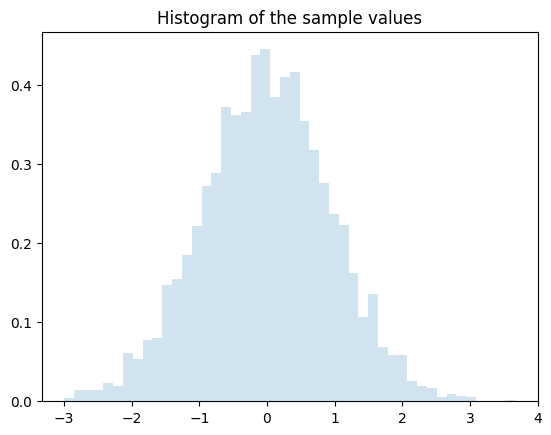

In [ ]:
plt.hist(s, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Histogram of the sample values' )

In [ ]:
estimated_mean = np.mean(s)
estimated_variance = np.var(s)
print('la moyenne estimé est :', estimated_mean)
print('la variance estimé est :', estimated_variance)
rvsest,pdfest=gaussian_1d_np(estimated_mean, estimated_variance)

la moyenne estimé est : -0.005944427275657654
la variance estimé est : 0.905854642450444


In [ ]:
means=np.array([mean0,mean1,mean2,mean3,mean4,mean5]).reshape(-1,1)
Covs=np.array([np.array([[svd0]]),np.array([[svd1]]),np.array([[svd2]]),np.array([[svd3]]),np.array([[svd4]]),np.array([[svd5]])])
wh=np.ones((nb_dist))/nb_dist
true_mean,true_var=ot.gaussian.bures_wasserstein_barycenter(means, Covs, wh)
rvst,pdft=gaussian_1d_np(true_mean, true_var)
print('la vraie moyenne', true_mean)
print('la vraie variance', true_var)

la vraie moyenne [-0.16666667]
la vraie variance [[1.4010349]]


In [ ]:
def gradient_at(f, x):
  x.requires_grad_(True)
  y = f(x)
  grad = torch.autograd.grad(y, x,grad_outputs=torch.ones_like(y))[0]
  x.requires_grad_(False)
  return grad
v1= sample1.to(device)-0.5*gradient_at(fs[0], sample1.to(device))
#v1=v1-torch.mean(v1) + torch.Tensor(mean0).to(device)
v1=v1.cpu().detach().numpy()

v2= sample2.to(device)-0.5*gradient_at(fs[1], sample2.to(device))
#v2=v2-torch.mean(v2)+ torch.Tensor(mean1).to(device)
v2=v2.cpu().detach().numpy()

v3= sample3.to(device)-0.5*gradient_at(fs[2], sample3.to(device))
#v3=v3-torch.mean(v3)+ torch.Tensor(mean2).to(device)
v3=v3.cpu().detach().numpy()

v4= sample4.to(device)-0.5*gradient_at(fs[3], sample4.to(device))
#v4=v4-torch.mean(v4)+ torch.Tensor(mean3).to(device)
v4=v4.cpu().detach().numpy()

v5= sample5.to(device)-0.5*gradient_at(fs[4], sample5.to(device))
#v5=v5-torch.mean(v5) + torch.Tensor(mean4).to(device)
v5=v5.cpu().detach().numpy()

v6= sample6.to(device)-0.5*gradient_at(fs[5], sample6.to(device))
#v6=v6-torch.mean(v6)+ torch.Tensor(mean5).to(device)
v6=v6.cpu().detach().numpy()

v=(v1+v2+v3+v4+v5+v6)/6
v=v1

In [ ]:
print('la variance estimé v2', np.var(v1))
print('la variance estimé v2', np.var(v2))
print('la variance estimé v2', np.var(v3))
print('la variance estimé v2', np.var(v4))
print('la variance estimé v2', np.var(v5))
print('la variance estimé v2', np.var(v6))
print('la variance estimé v2', np.var(v))
rvsest,pdfest2=gaussian_1d_np(true_mean, np.var(v1))


la variance estimé v2 1.0041596
la variance estimé v2 4.0214376
la variance estimé v2 4.0720677
la variance estimé v2 2.2591798
la variance estimé v2 0.23845331
la variance estimé v2 3.2824671
la variance estimé v2 0.4155243


/usr/local/lib/python3.10/dist-packages/ot/bregman/_barycenter.py:190: RuntimeWarning: invalid value encountered in multiply
  UKv = u * nx.dot(K.T, A / nx.dot(K, u))


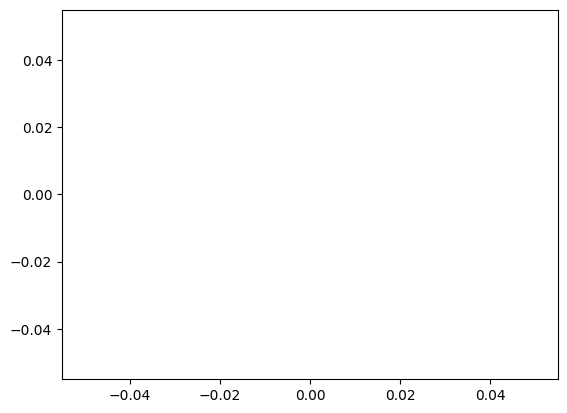

In [ ]:
n = 100 # nb bins

# bin positions
#x = np.arange(n, dtype=np.float64)
mu=0
sigma=3
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

a1 = pdf1(x)#ot.datasets.make_1D_gauss(n, m=0, s=1)  # m= mean, s= std
a2 = pdf2(x)#ot.datasets.make_1D_gauss(n, m=0, s=0.8)
a3 = pdf3(x)#ot.datasets.make_1D_gauss(n, m=0, s=2)  # m= mean, s= std
a4 = pdf4(x)#ot.datasets.make_1D_gauss(n, m=0, s=1.5)
#a5 = pdf5(x)#ot.datasets.make_1D_gauss(n, m=0, s=0.5)  # m= mean, s= std
#a6 = pdf6(x)#ot.datasets.make_1D_gauss(n, m=0, s=1.8)


# creating matrix A containing all distributions
A = np.vstack((a1, a2,a3,a4)).T#,a5,a6)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()
alpha = 0.2  # 0<=alpha<=1
weights = np.array([1 /6, 1/6,1 /6, 1/6])#,1/6, 1/6])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-2
bary_wass = ot.bregman.barycenter(A, M, reg, weights,numItermax=4000)
plt.plot(x,bary_wass)

In [ ]:
bary_wass

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

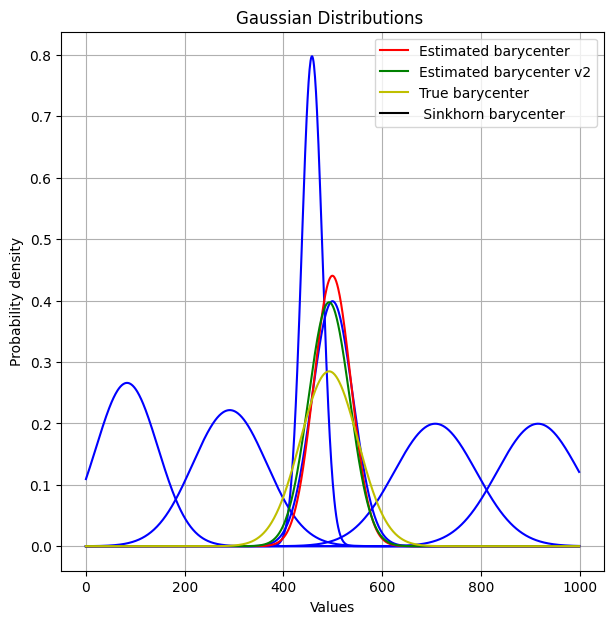

In [ ]:
mu=0
sigma=3
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y1=pdf1(x)
y2=pdf2(x)
y3=pdf3(x)
y4=pdf4(x)
y5=pdf5(x)
y6=pdf6(x)
y_est=pdfest(x)
y_est2=pdfest2(x)
y_true=pdft(x)
plt.figure(figsize=(7,7))
plt.plot( y1,color='b')
plt.plot( y2,color='b')
plt.plot( y3,color='b')
plt.plot( y4,color='b')
plt.plot( y5,color='b')
plt.plot( y6, color='b')
plt.plot( y_est,color='r',label='Estimated barycenter')
plt.plot( y_est2,color='g',label='Estimated barycenter v2')
plt.plot( y_true[0,:],color='y',label='True barycenter')
plt.plot( bary_wass,color='k',label=' Sinkhorn barycenter')

    # Légende et titre du graphique
plt.legend()
plt.title('Gaussian Distributions ')
plt.xlabel('Values')
plt.ylabel('Probability density')
plt.grid(True)
plt.show()

#Test avec des gaussiennes en 2D

In [ ]:
sample_size=5000
mean0=[0,0]
svd0=[[1, 0.5], [0.5, 1]]
rv0= multivariate_normal(mean0, svd0)
sample1=torch.Tensor(np.random.multivariate_normal(mean0, svd0, sample_size))
mean1=[1,1]
svd1=[[1, 0], [0, 1]]
rv1= multivariate_normal(mean1, svd1)
sample2=torch.Tensor(np.random.multivariate_normal(mean0, svd0, sample_size))
mean2=[0.5,0.5]
svd2=[[2, 0.5], [0.5, 2]]
rv2= multivariate_normal(mean2, svd2)
sample3=torch.Tensor(np.random.multivariate_normal(mean0, svd0, sample_size))
mean3=[2,2]
svd3=[[2, 1], [1, 2]]
rv3= multivariate_normal(mean3, svd3)
sample4=torch.Tensor(np.random.multivariate_normal(mean0, svd0, sample_size))
mean4=[1,0]
svd4=[[2, 1.5], [1.5, 2]]
rv4= multivariate_normal(mean4, svd4)
sample5=torch.Tensor(np.random.multivariate_normal(mean0, svd0, sample_size))
mean5=[0,1]
svd5=[[2.5, 2], [2,2.5]]
rv5= multivariate_normal(mean5, svd5)
sample6=torch.Tensor(np.random.multivariate_normal(mean0, svd0, sample_size))

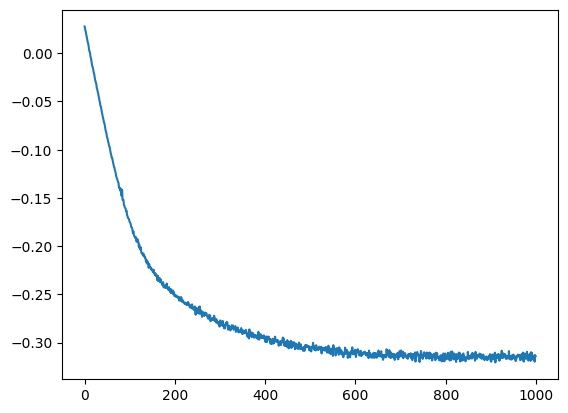

In [ ]:
nb_dist=6
batch_size=8000
n_epochs=1000
reg=0.1
weights=torch.ones((nb_dist))/nb_dist
#dist1=['gaussd1','gaussd2','gaussd3','gaussd4','gaussd5','gaussd6']
#dist1=['gaussd1','gaussd2','gaussd3',gaussd4]
fs,gs=compute_duals(weights, n_epochs=n_epochs,input_d=2,output_d=1,device='cuda',dist1=['gaussd1','gaussd2','gaussd3','gaussd4','gaussd5','gaussd6'],dist2='gaussd1',batch_size=batch_size,reg=reg,lr=0.00001)

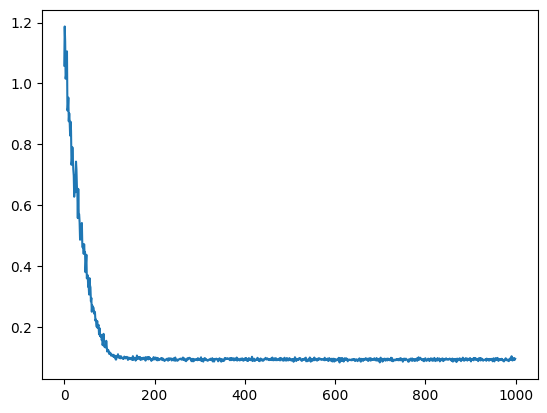

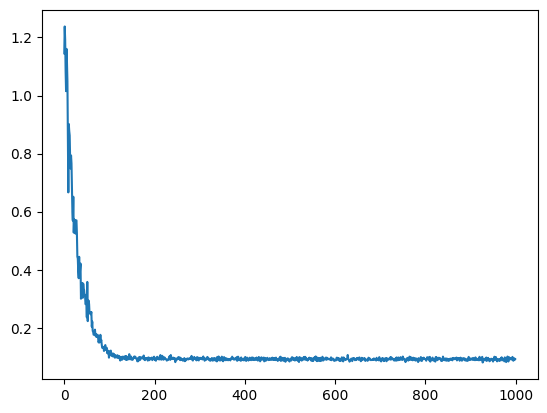

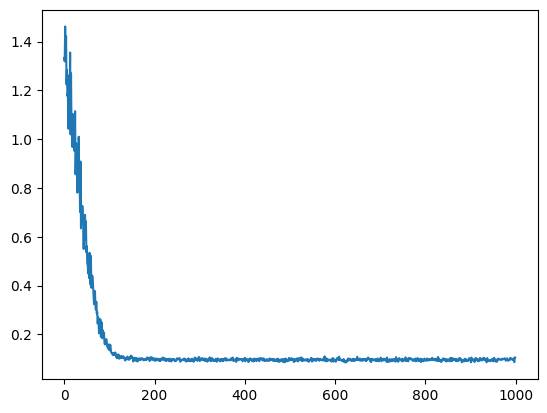

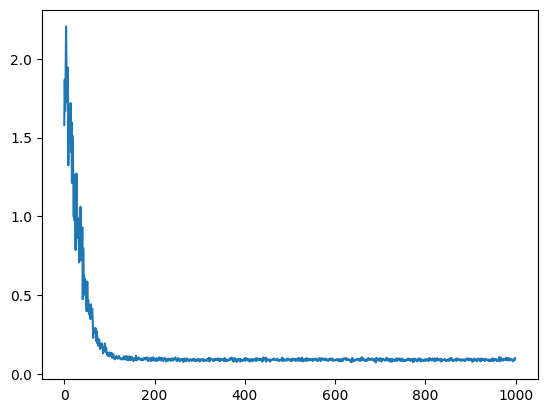

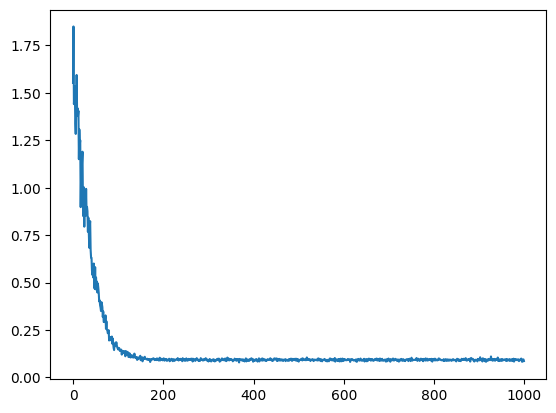

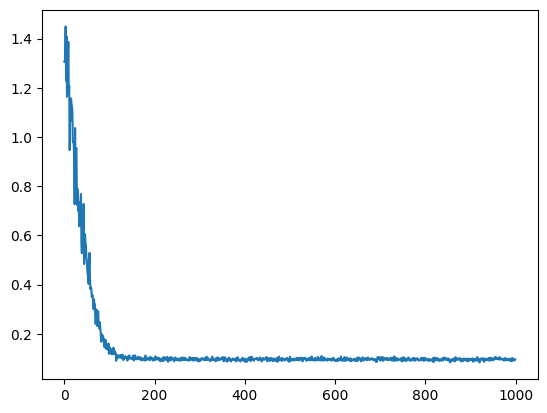

In [ ]:
Ts=learn_all_mapping(fs,gs,weights, n_epochs=n_epochs,input_d=2,output_d=2,device='cuda',dist1=['gaussd1','gaussd2','gaussd3','gaussd4','gaussd5','gaussd6'],dist2='gaussd1',batch_size=batch_size,reg=reg,lr=0.0001)

In [ ]:
s1=Ts[0](sample1.to(device))
s1=s1-torch.mean(s1,axis=0) + torch.Tensor(mean0).to(device)
s2=Ts[1](sample2.to(device))
s2=s2-torch.mean(s2,axis=0) + torch.Tensor(mean1).to(device)
s3=Ts[2](sample3.to(device))
s3=s3-torch.mean(s3,axis=0) + torch.Tensor(mean2).to(device)
s4=Ts[3](sample4.to(device))
s4=s4-torch.mean(s4,axis=0) + torch.Tensor(mean3).to(device)
s5=Ts[4](sample5.to(device))
s5=s5-torch.mean(s5,axis=0) + torch.Tensor(mean4).to(device)
s6=Ts[5](sample6.to(device))
s6=s6-torch.mean(s6,axis=0) + torch.Tensor(mean5).to(device)
s=(s1+s2+s3+s4+s5+s6)/6
s=s1.cpu().detach().numpy()

In [ ]:
print('la variance estimé v2', np.cov(s1.cpu().detach().numpy().T))
print('la variance estimé v2', np.cov(s2.cpu().detach().numpy().T))
print('la variance estimé v2', np.cov(s3.cpu().detach().numpy().T))
print('la variance estimé v2', np.cov(s4.cpu().detach().numpy().T))
print('la variance estimé v2', np.cov(s5.cpu().detach().numpy().T))
print('la variance estimé v2', np.cov(s6.cpu().detach().numpy().T))

la variance estimé v2 [[0.88751223 0.50073428]
 [0.50073428 0.90563414]]
la variance estimé v2 [[0.88981928 0.48809205]
 [0.48809205 0.914939  ]]
la variance estimé v2 [[0.91845636 0.49448602]
 [0.49448602 0.90565294]]
la variance estimé v2 [[0.8728481  0.48503937]
 [0.48503937 0.91911338]]
la variance estimé v2 [[0.91513253 0.50350329]
 [0.50350329 0.90137408]]
la variance estimé v2 [[0.86753366 0.45217041]
 [0.45217041 0.86458518]]


In [ ]:
def gradient_at(f, x):
  x.requires_grad_(True)
  y = f(x)
  grad = torch.autograd.grad(y, x,grad_outputs=torch.ones_like(y))[0]
  x.requires_grad_(False)
  return grad
v1= sample1.to(device)-0.5*gradient_at(fs[0], sample1.to(device))
v1=v1-torch.mean(v1,axis=0) + torch.Tensor(mean0).to(device)
v1=v1.cpu().detach().numpy()

v2= sample2.to(device)-0.5*gradient_at(fs[1], sample2.to(device))
v2=v2-torch.mean(v2,axis=0)+ torch.Tensor(mean1).to(device)
v2=v2.cpu().detach().numpy()

v3= sample3.to(device)-0.5*gradient_at(fs[2], sample3.to(device))
v3=v3-torch.mean(v3,axis=0)+ torch.Tensor(mean2).to(device)
v3=v3.cpu().detach().numpy()

v4= sample4.to(device)-0.5*gradient_at(fs[3], sample4.to(device))
v4=v4-torch.mean(v4,axis=0)+ torch.Tensor(mean3).to(device)
v4=v4.cpu().detach().numpy()

v5= sample5.to(device)-0.5*gradient_at(fs[4], sample5.to(device))
v5=v5-torch.mean(v5,axis=0) + torch.Tensor(mean4).to(device)
v5=v5.cpu().detach().numpy()

v6= sample6.to(device)-0.5*gradient_at(fs[5], sample6.to(device))
v6=v6-torch.mean(v6,axis=0)+ torch.Tensor(mean5).to(device)
v6=v6.cpu().detach().numpy()

v=(v1+v2+v3+v4+v5+v6)/6


In [ ]:
print('la variance estimé v2', np.cov(v1.T))
print('la variance estimé v2', np.cov(v2.T))
print('la variance estimé v2', np.cov(v3.T))
print('la variance estimé v2', np.cov(v4.T))
print('la variance estimé v2', np.cov(v5.T))
print('la variance estimé v2', np.cov(v6.T))


la variance estimé v2 [[0.97688592 0.50569199]
 [0.50569199 1.00137255]]
la variance estimé v2 [[0.96875377 0.48496969]
 [0.48496969 0.99874284]]
la variance estimé v2 [[0.99668679 0.50186636]
 [0.50186636 0.99618748]]
la variance estimé v2 [[0.98534428 0.48933884]
 [0.48933884 0.9706527 ]]
la variance estimé v2 [[1.00548993 0.50976706]
 [0.50976706 0.99151415]]
la variance estimé v2 [[0.96092684 0.4559748 ]
 [0.4559748  0.9575876 ]]


In [ ]:
estimated_mean_v2 = np.mean(v1,axis=0)
estimated_variance_v2 = np.cov(v1.T)
print('la moyenne estimé est :', estimated_mean_v2)
print('la variance estimé est :', estimated_variance_v2)
#rvsest,pdfest=gaussian_1d_np(estimated_mean, estimated_variance)

la moyenne estimé est : [ 3.5524368e-09 -9.8109245e-09]
la variance estimé est : [[0.97688592 0.50569199]
 [0.50569199 1.00137255]]


In [ ]:
estimated_mean = np.mean(s,axis=0)
estimated_variance = np.cov(s.T)
print('la moyenne estimé est :', estimated_mean)
print('la variance estimé est :', estimated_variance)
#rvsest,pdfest=gaussian_1d_np(estimated_mean, estimated_variance)

la moyenne estimé est : [1.37412304e-16 9.07718345e-16]
la variance estimé est : [[0.88751223 0.50073428]
 [0.50073428 0.90563414]]


In [ ]:
means=np.array([mean0,mean1,mean2,mean3,mean4,mean5])
Covs=np.array([np.array(svd0),np.array(svd1),np.array(svd2),np.array(svd3),np.array(svd4),np.array(svd5)])
wh=np.ones((nb_dist))/nb_dist
true_mean,true_var=ot.gaussian.bures_wasserstein_barycenter(means, Covs, wh)
rvst,pdft=gaussian_1d_np(true_mean, true_var)
print('la vraie moyenne', true_mean)
print('la vraie variance', true_var)

la vraie moyenne [0.75 0.75]
la vraie variance [[1.6583736  0.86447328]
 [0.86447328 1.6583736 ]]


In [ ]:
np.linalg.norm(estimated_variance_v2-true_var,ord='fro')

1.0740222791652365

In [ ]:
from ot.bregman import (barycenter, barycenter_debiased,
                        convolutional_barycenter2d,
                        convolutional_barycenter2d_debiased)
f1 = sample1
f2 = sample2
f3 = sample3
f4 = sample4
f5 = sample5
f6 = sample6

A = np.asarray([f1, f2,f3,f4,f5,f6]) + 1e-2
#A /= A.sum(axis=(1, 2))[:, None, None]
eps=1e-1
bar = convolutional_barycenter2d(A, eps)


<ipython-input-218-f3af0fa0da27>:11: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  A = np.asarray([f1, f2,f3,f4,f5,f6]) + 1e-2
<ipython-input-218-f3af0fa0da27>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A = np.asarray([f1, f2,f3,f4,f5,f6]) + 1e-2


IndexError: tuple index out of range

Text(0.5, 1.0, '$True Barycenter$')

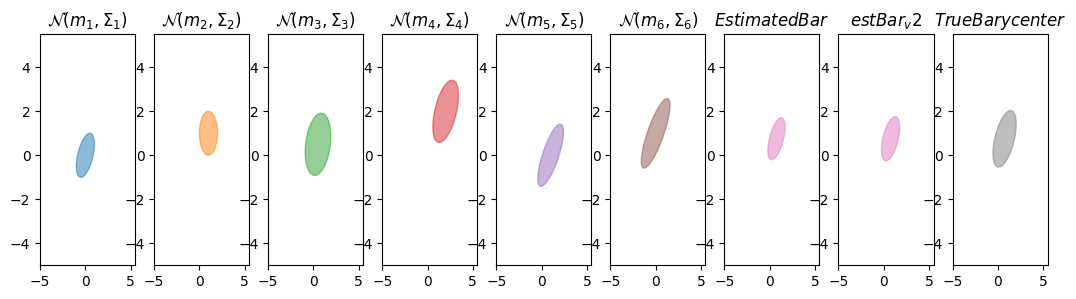

In [ ]:
from matplotlib import colors
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pylab as pl


def draw_cov(mu, C, color=None, label=None, nstd=1):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]

    vals, vecs = eigsorted(C)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(mu[0], mu[1]),
                  width=w, height=h, alpha=0.5,
                  angle=theta, facecolor=color, edgecolor=color, label=label, fill=True)
    pl.gca().add_artist(ell)
    #pl.scatter(mu[0],mu[1],color=color, marker='x')


axis = [-5, 5.5, -5, 5.5]

pl.figure(1, (13, 3))
pl.clf()

pl.subplot(1, 9, 1)
draw_cov(mean0, svd0, color='C0')
pl.axis(axis)
pl.title('$\mathcal{N}(m_1,\Sigma_1)$')

pl.subplot(1, 9, 2)
draw_cov(mean1, svd1, color='C1')
pl.axis(axis)
pl.title('$\mathcal{N}(m_2,\Sigma_2)$')

pl.subplot(1, 9, 3)
draw_cov(mean2, svd2, color='C2')
pl.axis(axis)
pl.title('$\mathcal{N}(m_3,\Sigma_3)$')

pl.subplot(1, 9, 4)
draw_cov(mean3, svd3, color='C3')
pl.axis(axis)
pl.title('$\mathcal{N}(m_4,\Sigma_4)$')

pl.subplot(1, 9, 5)
draw_cov(mean4, svd4, color='C4')
pl.axis(axis)
pl.title('$\mathcal{N}(m_5,\Sigma_5)$')

pl.subplot(1, 9, 6)
draw_cov(mean5, svd5, color='C5')
pl.axis(axis)
pl.title('$\mathcal{N}(m_6,\Sigma_6)$')

pl.subplot(1, 9, 7)
draw_cov(true_mean, estimated_variance, color='C6')
pl.axis(axis)
pl.title('$Estimated Bar$')

pl.subplot(1, 9, 8)
draw_cov(true_mean, estimated_variance_v2, color='C6')
pl.axis(axis)
pl.title('$est Bar_v2$')

pl.subplot(1, 9, 9)
draw_cov(true_mean, true_var, color='C7')
pl.axis(axis)
pl.title('$True Barycenter$')

# Test avec Mnist

100%|██████████| 9912422/9912422 [00:00<00:00, 125507034.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28931381.38it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40336481.27it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4926436.20it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



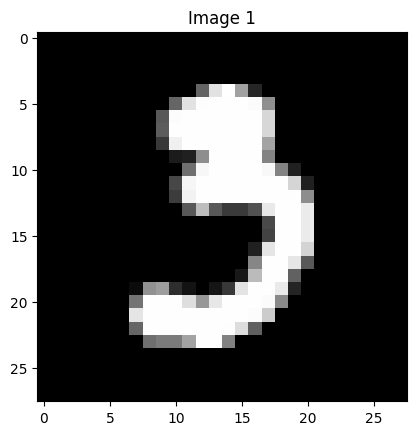

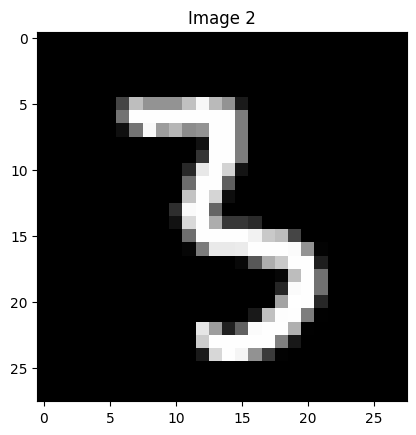

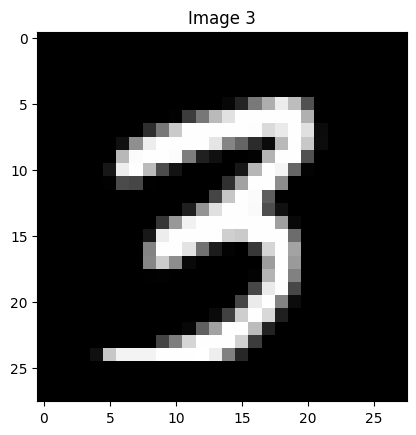

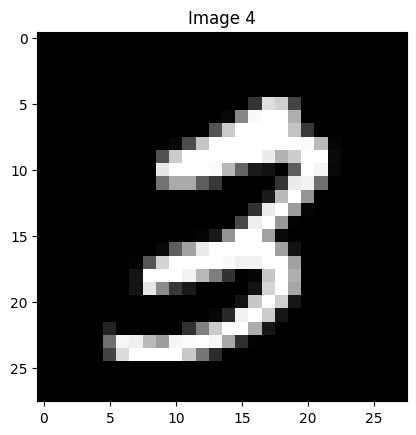

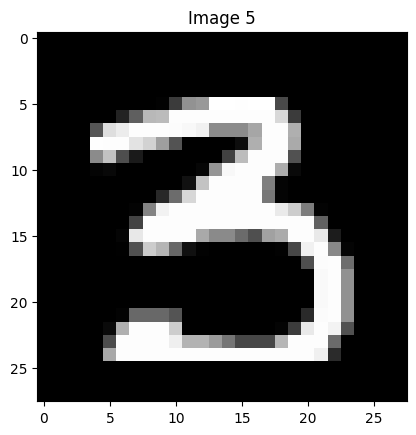

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Transformation pour normaliser les images MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Charger le dataset MNIST avec torchvision
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=1, shuffle=True)



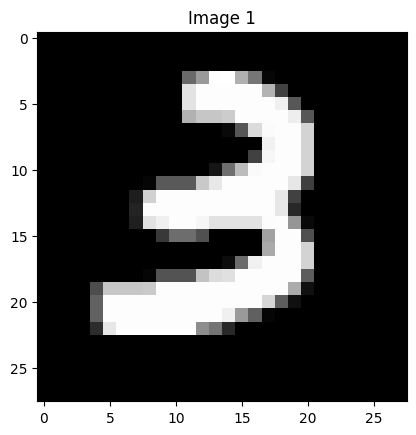

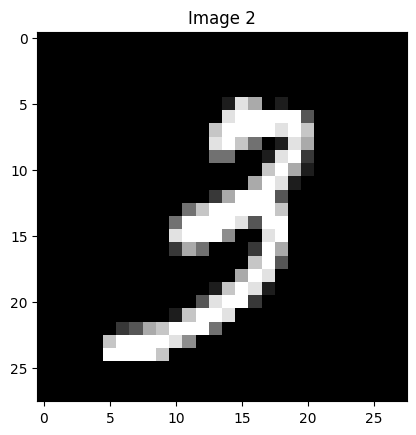

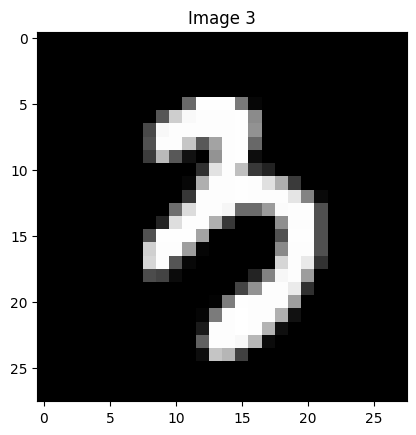

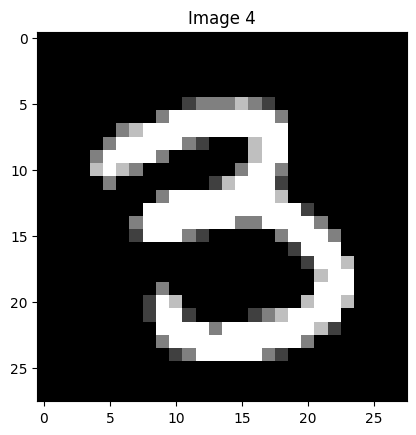

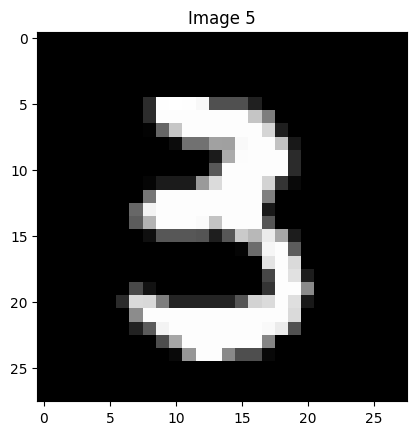

In [ ]:
# Filtrer les images avec le label 3
images_label_3 = []

for image, label in train_loader:
    if label == 3:
        images_label_3.append(image.squeeze().numpy())

# Afficher les 5 premières images ayant le label 3
for i in range(5):
    plt.imshow(images_label_3[i], cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.show()


In [ ]:
test=images_label_3[:5]


# test2
